#### 2025 플레이브 벳지 이벤트 효과 분석
- 이벤트 기간 : 2025.02.28 ~ 2025.03.21 
- 아티스트 ID : 3207401
- 이벤트 ID : 36723
- 최근 앨범 발매 : 2025.02.03 Caligo Pt.1 (뱃지 이벤트 O)
- 전년 앨범 발매 : 2024.02.26 ASTERUM : 134-1 (뱃지 이벤트 X)
- 관련 아지트 : https://podo.agit.in/g/300093279/wall/423342418
- 뱃지 수신자 : 9,099명

#### 분석 목적 및 내용
- 플레이브 스페셜 뱃지 이벤트 효과 분석 : 이벤트 참여자수, 조건 해당자수 등. 비슷한 시기 이벤트 대비 효과적이었는지
- 해지방어효과: 해지 이후에도 재가입을 했는지  (재가입해도 뱃지 준다고 했으므로), 작년 비슷한 시기(24/2/26)와 비교해 플레이브 팬덤 가입 및 해지 변화가 있었는지 (이벤트 효과가 있었는지) 
- 기타 뱃지 이벤트 진행 시 향후 인사이트: 이번 Caligo Pt.1 이후, Pt.2 발매 시점에도 뱃지를 준다면 어떤 점을 포인트로 해야 하는지

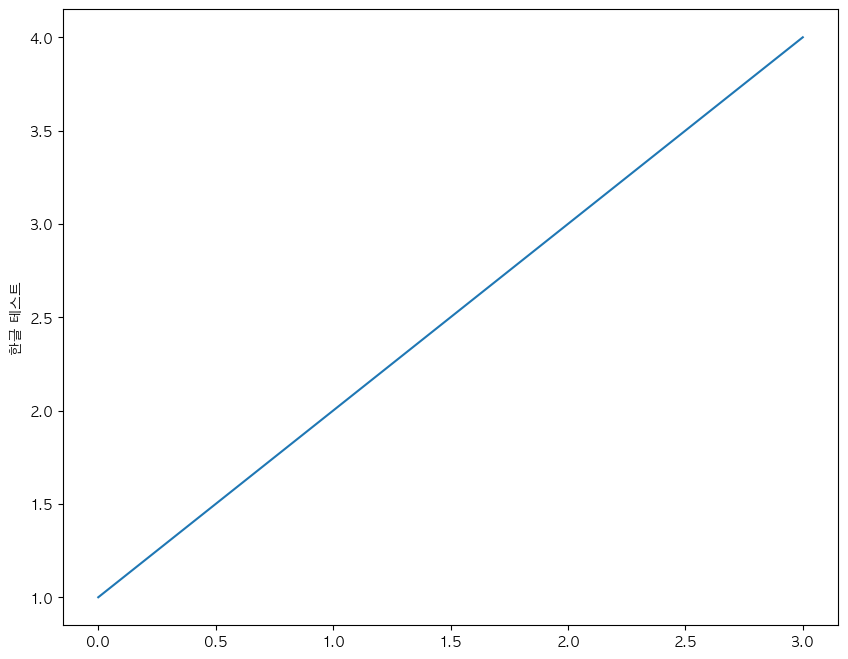

In [8]:
## import library
import trino
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


plt.rcParams['figure.figsize'] = [10, 8]

conn = trino.dbapi.connect(
    host='kakaoent-presto-adhoc.kakaoent.io',
    port=8443,
    user='samuel-ch',
    catalog='hadoop_kent',
    schema='default',                          # 사용할 Database 지정
    http_scheme='https',
    auth=trino.auth.BasicAuthentication("samuel-ch", "melon!Q2w3e"),  # 카카오 LDAP이 아닌 하둡 LDAP 입력
    http_headers={
        'X-Presto-User': 'samuel-ch',
        'X-Presto-Time-Zone': 'Asia/Seoul'
    },
)
cur = conn.cursor()

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

cm = sns.light_palette("green", as_cmap=True)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# AppleGothic 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 테스트 플롯
plt.plot([1, 2, 3, 4])
plt.ylabel('한글 테스트')
plt.show()

## 이벤트 유입 효과 분석
- 이벤트 페이지 방문자 및 외부유입 사용자 비중 
- 이벤트 참여자 및 팬덤 사용자 유입 효과
- 동일 기간 이벤트 비교.
- 과거 플레이브 이벤트(24년 8월 뮤직웨이브,25년2월 뮤지구에이브)와 비교

In [66]:
# 동일기간 및 과거 이벤트 데이터 기준 페이지 방문자 및 이벤트 응모자 집계
event_user_query = '''
with event_df as(
select seq
         , event_id
         , parent_event_id
         , title
         , start_date
         , end_date
         , category
         , entry_target
         , winner_noti_date
         , gift_dp_name
         , case
            when event_id IN (36723,36341,36683) then 3207401
            when event_id = 36742 then 725984
            when event_id = 36746 then 468244
            when event_id = 36750 then 725984
            when event_id = 36749 then 995173
            when event_id = 36757 then 4099078
            when event_id = 36741 then 476181
            when event_id = 36740 then 647971
            when event_id = 36743 then 253688
            when event_id = 36747 then 2880278
          end artist_id  
         , case
            when event_id = 36723 then '뱃지이벤트'
            when event_id in (36742,36341,36683) then '뮤직웨이브'
            when event_id = 36746 then '에디션M'
            when event_id = 36750 then '매거진이벤트'
            when event_id = 36749 then '스포트라이트'
            when event_id = 36757 then '하이라이징'
            when event_id = 36741 then '매거진이벤트'
            when event_id = 36740 then '매거진이벤트'
            when event_id = 36743 then '매거진이벤트'
            when event_id = 36747 then '아티스트는뭘듣니'
           end event_type    
         , case
            when event_id = 36723 then 1000000386
            when event_id in (36742,36341,36683) then 1000003041
            when event_id = 36746 then 1000000498
            when event_id = 36750 then 1000000498
            when event_id = 36749 then 1000002847
            when event_id = 36757 then 1000000498
            when event_id = 36741 then 1000000498
            when event_id = 36740 then 1000000498
            when event_id = 36743 then 1000000498
            when event_id = 36747 then 1000000498
           end menu_id    
         , case
            when event_id = 36723 then '36723'
            when event_id = 36742 then '571'
            when event_id = 36746 then '15872'
            when event_id = 36750 then '15901'
            when event_id = 36749 then '152'
            when event_id = 36757 then '15911'
            when event_id = 36741 then '15893'
            when event_id = 36740 then '15892'
            when event_id = 36743 then '15894'
            when event_id = 36747 then '15897'
            when event_id in (36341,36683) then '1945'
           end conts_id  
    from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO 
    where melon_short_date_format(start_date) > '20240201'
    and melon_short_date_format(end_date) < '20250322'
    and entry_target = 'PROD'
    and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
    --and category = '100065' /* 이벤트 종류 (100065 : 멜론 이벤트, 100066 : 앨범이벤트, 100067 : 공연이벤트, 100068 : 뮤직스토리이벤트, 100069 : 스토리 이벤트, 100070 : 패밀리앱 이벤트, 100071 : MWK 이벤트) */
), fandom_user_df as(
    select t1.event_id
         , t1.artist_id
         , count(distinct t2.member_key) as fandom_user_cnt
    from event_df t1
    left join(
    select artist_id
         , log_date
         , member_key
    from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
    where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
    and artist_id in (3207401,725984,4099078,476181,647971,253688,2880278,995173,468244)
    AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
    group by 1,2,3
    ) t2 on t1.artist_id = t2.artist_id and t2.log_date between melon_short_date_format(t1.start_date) and melon_short_date_format(t1.end_date)
    group by 1,2
)
select t1.event_id
     , t1.title
     , t1.event_type
     , t1.start_date
     , t1.end_date
     , t1.category
     , t1.entry_target
     , t1.winner_noti_date
     , t1.gift_dp_name
     , t3.pageview_cnt
     , t3.inflow_pageview_cnt
     , t3.pageview_user_cnt
     , t3.inflow_pageview_user_cnt
     , t2.ent_user_cnt
     , t2.ent_fandom_user_cnt
     , cast(t2.ent_fandom_user_cnt as double)/cast(t2.ent_user_cnt as double)*100 as ent_fandom_user_ratio
     , t4.fandom_user_cnt
     , cast(t2.ent_fandom_user_cnt as double)/cast(t4.fandom_user_cnt as double)*100 as fandom_user_ratio
from event_df t1
left join (
    select A.event_id
         , count(A.member_key) as ent_user_cnt
         , count(if(B.member_key is not null,A.member_key)) as ent_fandom_user_cnt
    from(
        select event_id
             , member_key
             , reg_date
             , case
                when event_id IN (36723,36341,36683) then 3207401
                when event_id = 36742 then 725984
                when event_id = 36746 then 468244
                when event_id = 36750 then 725984
                when event_id = 36749 then 995173
                when event_id = 36757 then 4099078
                when event_id = 36741 then 476181
                when event_id = 36740 then 647971
                when event_id = 36743 then 253688
                when event_id = 36747 then 2880278
              end artist_id  
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO 
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
        group by 1,2,3,4
    ) A
    left join (
        select artist_id
             , member_key
             , log_date
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
        where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        group by 1,2,3
    ) B on melon_short_date_format(A.reg_date) = B.log_date and A.artist_id = B.artist_id and A.member_key = B.member_key
    left join(
        select dt
             , user_mkey
             , first_buy_no
             , buy_no
             , prod_prt_cd
             , prod_attr_cd
        from(     
        SELECT A.DT
             , A.USER_MKEY
             , A.FIRST_BUY_NO
             , A.BUY_NO
             , B.PROD_PRT_CD
             , B.prod_attr_cd
             , RANK() OVER(PARTITION BY A.USER_MKEY ORDER BY PROD_PRT_CD,prod_attr_cd) as rnk 
        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT A
        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD B ON (A.PROD_ID = B.PROD_ID)
        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.SBY_BUY_TB_RO C ON (A.BUY_NO = C.BUY_NO)
        WHERE (A.log_date between '20250228' and '20250321' or A.log_date between '20250203' and '20250216' or A.log_date between '20240820' and '20240901')
        AND A.PROD_STAT_CD NOT IN (3401, 3901)
        AND A.DT <= A.VLD_END_DATE -- DCB 일시정지 제외
        AND B.PROD_ATTR_CD NOT IN (10040, 10050) -- 종량,기타 제외
        AND B.PROD_SELL_PRT_CD = 60000 -- B2C
        AND B.PROD_PRT_CD IN (20000,20010) -- 클럽상품,티켓상품
        AND A.PF_YN = 1
        GROUP BY 1, 2, 3, 4, 5, 6
        )
    ) C on A.member_key = C.user_mkey and date(A.reg_date) = C.dt
    group by 1
) t2 on t1.event_id = t2.event_id
LEFT JOIN (
    select B.event_id
         , count(distinct A.member_key) as pageview_user_cnt
         , count(1) as pageview_cnt
         , count(distinct if(inflow_prt_nm is not null, A.member_key )) as inflow_pageview_user_cnt
         , sum(if(inflow_prt_nm is not null, 1,0 )) as inflow_pageview_cnt
    from hadoop_kent.melon_ods_stat_production.o_pv_log_ro A
    join event_df B on A.conts_id = B.conts_id and A.reg_date between B.start_date and B.end_date and A.menu_id = B.menu_id
    LEFT JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_INFLOW_PRT C ON A.INFLOW_PLACE_CODE = C.INFLOW_PRT_CODE
    where (A.log_date between '20250228' and '20250321' or A.log_date between '20240820' and '20240901')
    and (melon_short_date_format(A.reg_date) between '20250227' and '20250322' or melon_short_date_format(A.reg_date) between '20240820' and '20240901')
    and A.menu_id in (1000000498,1000002847,1000000386,1000003041)
    group by 1
    union all /* 24년12월 ~ 25년2월 뮤직웨이브 데이터 누락으로 티아라로그로 대체 */
    select 36683 as event_id
         , count(distinct t1.member_key) as pageview_user_cnt
         , sum(pageview_cnt) as pageview_cnt
         , count(distinct t2.member_Key) as inflow_pageview_user_cnt
         , sum(t2.inflow_pageview_cnt) as inflow_pageview_cnt
    from(
        SELECT member_key
             , count(1) as pageview_cnt
        FROM HADOOP_KENT.MELON_DA_STAT_PRODUCTION.NEW_TIARA_PAGEVIEW_MUSICWAVE
        WHERE LOG_DATE BETWEEN CAST('20250203' AS VARCHAR(8)) AND CAST('20250216' AS VARCHAR(8))
        and channel_key ='artistrep_3207401'
        group by 1
    ) t1
    left join(
        select TRY_CAST(USER.MELON_ID AS BIGINT) AS MEMBER_KEY
             , count(1) as inflow_pageview_cnt
        FROM HADOOP_KENT.MELON_IDENTIFIED_PRODUCTION.TIARA_IDENTIFIED_FORMATTED_V2
        WHERE LOG_DATE BETWEEN CAST('20250203' AS VARCHAR(8)) and CAST('20250216' AS VARCHAR(8))
        AND sdk.type IN ('IA','AA')	
        and COMMON.PAGE = '유입'
        and lower(common.t_obj) like '%plave%'	 
        group by 1
    ) t2 on t1.member_key = t2.member_key
group by 1
) t3 on t1.event_id = t3.event_id
left join fandom_user_df t4 on t1.event_id = t4.event_id and t1.artist_id = t4.artist_id
order by ent_user_cnt desc
'''

cur.execute(event_user_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_user_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_user_df.head()

IndexError: list index out of range

In [110]:
# pandas를 사용하여 CSV 파일 로드
import pandas as pd

# CSV 파일 경로
csv_file_path = "event_user_data.csv"

# CSV 파일 읽기
try:
    event_user_data = pd.read_csv(csv_file_path)
    print("CSV 파일이 성공적으로 로드되었습니다.")
    print(event_user_data.head())  # 데이터 미리보기
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {csv_file_path}")
except Exception as e:
    print(f"CSV 파일 로드 중 오류 발생: {e}")

CSV 파일이 성공적으로 로드되었습니다.
   event_id                  title event_type               start_date  \
0     36683  PLAVE(플레이브) 뮤직웨이브 이벤트      뮤직웨이브  2025-02-03 18:00:00.000   
1     36723    평생 PLAVE 마이획득뱃지 이벤트      뱃지이벤트  2025-02-28 12:00:00.000   
2     36341        PLAVE 뮤직웨이브 이벤트      뮤직웨이브  2024-08-20 18:00:00.000   
3     36742       j-hope 뮤직웨이브 이벤트      뮤직웨이브  2025-03-07 12:00:00.000   
4     36750          j-hope 댓글 이벤트     매거진이벤트  2025-03-07 14:00:00.000   

                  end_date  category entry_target         winner_noti_date  \
0  2025-02-16 23:59:59.000    100065         PROD  2025-02-25 12:00:00.000   
1  2025-03-21 23:59:59.000    100065         PROD  2025-04-30 00:00:00.000   
2  2024-09-01 23:59:59.000    100065         PROD  2024-09-09 15:00:00.000   
3  2025-03-21 23:59:59.000    100065         PROD  2025-04-03 12:00:00.000   
4  2025-03-21 23:59:59.000    100068         PROD  2025-03-28 12:00:00.000   

         gift_dp_name  pageview_cnt  inflow_pageview_cnt  pagev

In [111]:
event_user_data['ent_normal_user_cnt'] = event_user_data['ent_user_cnt'] - event_user_data['ent_fandom_user_cnt']

In [196]:
event_user_data['ent_user_ratio'] = event_user_data['ent_user_cnt']/event_user_data['pageview_user_cnt']*100

In [197]:
event_user_data

,event_id,title,event_type,start_date,end_date,category,entry_target,winner_noti_date,gift_dp_name,pageview_cnt,inflow_pageview_cnt,pageview_user_cnt,inflow_pageview_user_cnt,ent_user_cnt,ent_fandom_user_cnt,ent_normal_user_cnt,ent_fandom_user_ratio,fandom_user_cnt,fandom_user_ratio,ent_user_ratio
0,36683,PLAVE(플레이브) 뮤직웨이브 이벤트,뮤직웨이브,2025-02-03 18:00:00,2025-02-16 23:59:59.000,100065,PROD,2025-02-25 12:00:00.000,프라이빗 메시지 20명,245749,16440,39802,11525,17536,13911,3625,79.328239,56393,24.667955,44.058088
1,36723,평생 PLAVE 마이획득뱃지 이벤트,뱃지이벤트,2025-02-28 12:00:00,2025-03-21 23:59:59.000,100065,PROD,2025-04-30 00:00:00.000,'평생 PLAVE' 마이획득뱃지,150113,21994,33468,6551,16992,14735,2257,86.717279,57881,25.457404,50.770886
2,36341,PLAVE 뮤직웨이브 이벤트,뮤직웨이브,2024-08-20 18:00:00,2024-09-01 23:59:59.000,100065,PROD,2024-09-09 15:00:00.000,사인 컨셉 포토 (5명),129024,16470,28099,2857,14850,12765,2085,85.959596,42254,30.210158,52.848856
3,36742,j-hope 뮤직웨이브 이벤트,뮤직웨이브,2025-03-07 12:00:00,2025-03-21 23:59:59.000,100065,PROD,2025-04-03 12:00:00.000,미공개 독점 사인 포토 3장,116703,2411,25288,229,6279,1426,4853,22.710623,7263,19.633760,24.829959
4,36750,j-hope 댓글 이벤트,매거진이벤트,2025-03-07 14:00:00,2025-03-21 23:59:59.000,100068,PROD,2025-03-28 12:00:00.000,사인 포토 5명,40361,442,24371,46,2885,790,2095,27.383016,7263,10.877048,11.837840
5,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,스포트라이트,2025-03-07 00:00:00,2025-03-20 23:59:59.000,100065,PROD,2025-03-27 18:00:00.000,사인CD (30명),44632,4446,30313,2564,2315,228,2087,9.848812,3573,6.381192,7.636987
6,36757,KiiiKiii (키키) 댓글 이벤트 #1,하이라이징,2025-03-12 18:00:00,2025-03-18 23:59:59.000,100068,PROD,2025-03-20 14:00:00.000,데뷔 쇼케이스 초대권 50명 (1인 1매),26208,4833,15224,2406,1932,241,1691,12.474120,1178,20.458404,12.690489
7,36741,인피니트 댓글 이벤트,매거진이벤트,2025-03-06 18:00:00,2025-03-20 23:59:59.000,100068,PROD,2025-03-27 12:00:00.000,사인 CD 10명,19594,1602,11571,252,1065,536,529,50.328638,6283,8.530957,9.204045
8,36740,비투비 댓글 이벤트,매거진이벤트,2025-03-05 18:00:00,2025-03-19 23:59:59.000,100068,PROD,2025-03-26 12:00:00.000,사인 CD + 미공개 단체 인화 사진 10명,14760,838,9070,20,786,259,527,32.951654,9492,2.728614,8.665932
9,36743,Lady Gaga 댓글 이벤트,매거진이벤트,2025-03-07 12:00:00,2025-03-21 23:59:59.000,100068,PROD,2025-03-28 12:00:00.000,CD 10명,19692,374,15029,2,749,4,745,0.534045,608,0.657895,4.983698


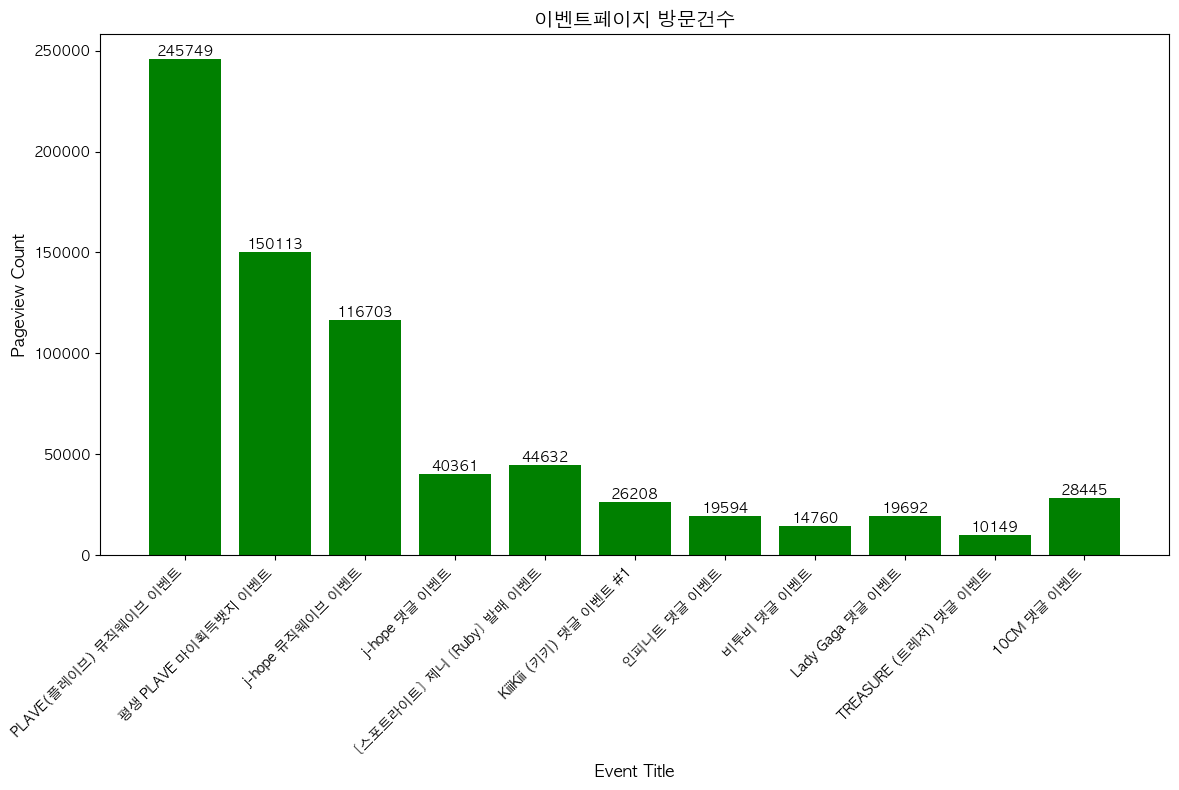

In [113]:
# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 pageview_cnt 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(events_2025['title'], events_2025['pageview_cnt'], color='green')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['pageview_cnt']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Event Title', fontsize=12)
plt.ylabel('Pageview Count', fontsize=12)
plt.title('이벤트페이지 방문건수', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

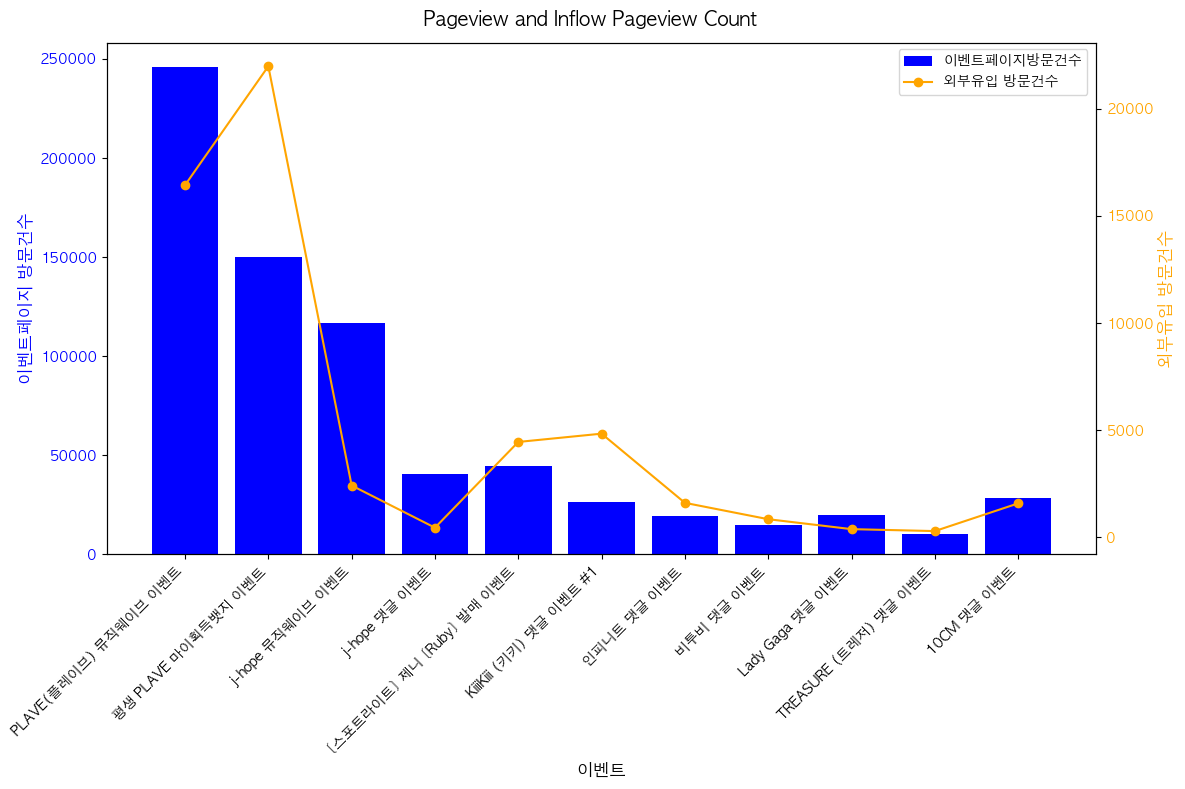

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 데이터
titles = events_2025['title']
pageview_cnt = events_2025['pageview_cnt']
inflow_pageview_cnt = events_2025['inflow_pageview_cnt']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축: pageview_user_cnt
ax1.bar(titles, pageview_cnt, color='blue', label='이벤트페이지방문건수')
ax1.set_xlabel('이벤트', fontsize=12)
ax1.set_ylabel('이벤트페이지 방문건수', fontsize=12, color='blue', fontweight='bold')  # 볼드체 설정
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(titles)))
ax1.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)

# 두 번째 y축: inflow_pageview_user_cnt
ax2 = ax1.twinx()
ax2.plot(titles, inflow_pageview_cnt, color='orange', marker='o', label='외부유입 방문건수')
ax2.set_ylabel('외부유입 방문건수', fontsize=12, color='orange', fontweight='bold')  # 볼드체 설정
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 및 레이아웃 설정
fig.suptitle('Pageview and Inflow Pageview Count', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.94))
fig.tight_layout()

plt.show()

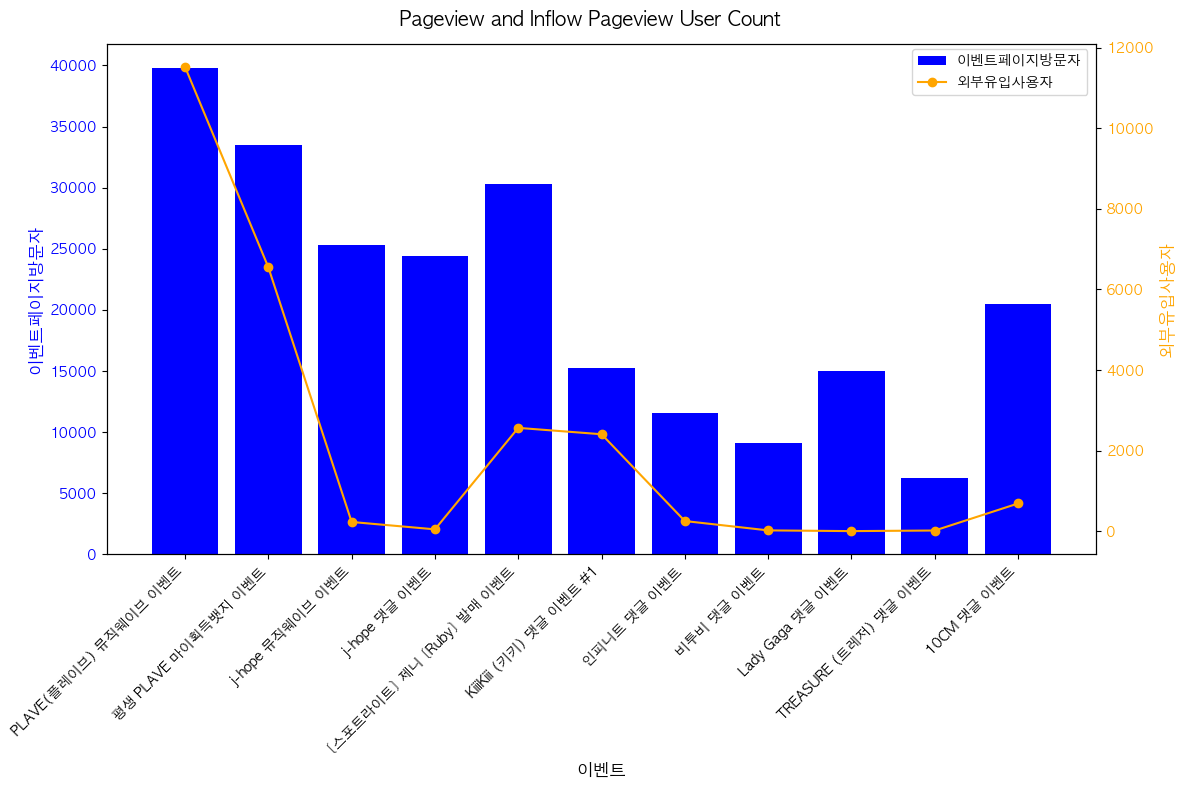

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 데이터
titles = events_2025['title']
pageview_user_cnt = events_2025['pageview_user_cnt']
inflow_pageview_user_cnt = events_2025['inflow_pageview_user_cnt']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축: pageview_user_cnt
ax1.bar(titles, pageview_user_cnt, color='blue', label='이벤트페이지방문자')
ax1.set_xlabel('이벤트', fontsize=12)
ax1.set_ylabel('이벤트페이지방문자', fontsize=12, color='blue', fontweight='bold')  # 볼드체 설정
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(titles)))
ax1.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)

# 두 번째 y축: inflow_pageview_user_cnt
ax2 = ax1.twinx()
ax2.plot(titles, inflow_pageview_user_cnt, color='orange', marker='o', label='외부유입사용자')
ax2.set_ylabel('외부유입사용자', fontsize=12, color='orange', fontweight='bold')  # 볼드체 설정
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 및 레이아웃 설정
fig.suptitle('Pageview and Inflow Pageview User Count', fontsize=14)
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.94))

plt.show()

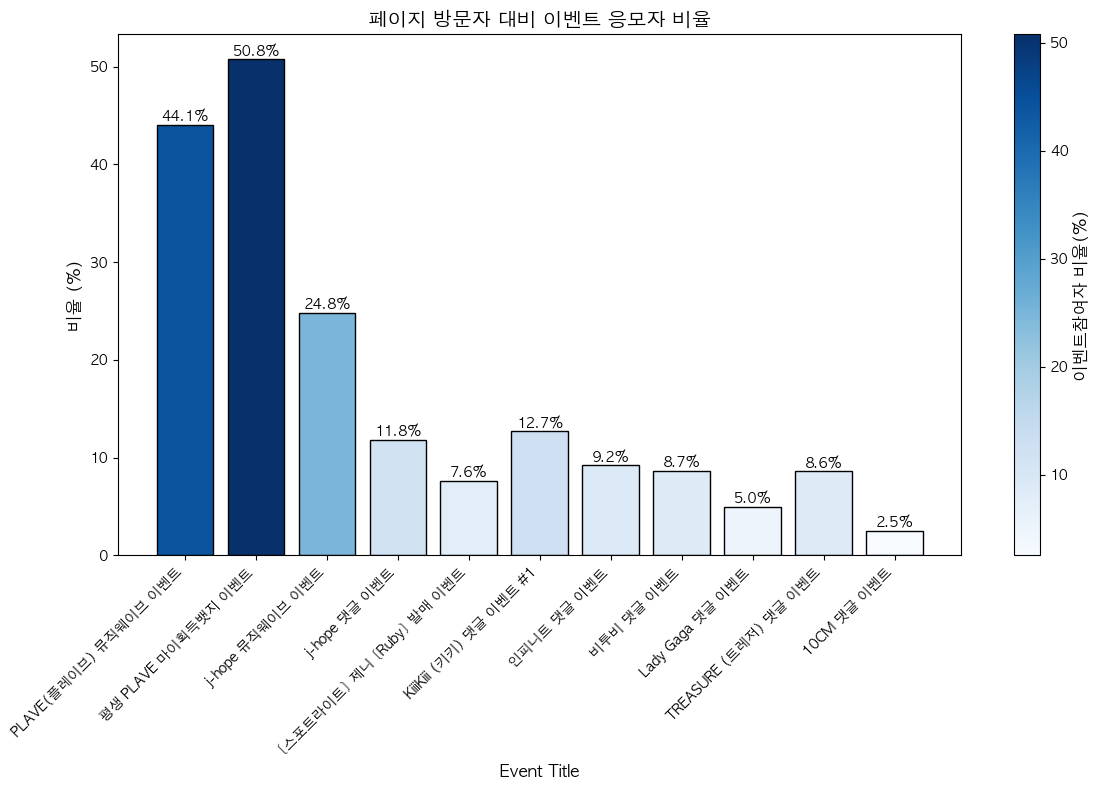

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# Normalize를 사용하여 ent_user_ratio 값의 색상 그라데이션 설정
norm = Normalize(vmin=events_2025['ent_user_ratio'].min(), vmax=events_2025['ent_user_ratio'].max())
cmap = plt.cm.Blues  # 색상 맵 설정 (Blues)

# 막대 색상 설정
colors = cmap(norm(events_2025['ent_user_ratio']))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))  # Axes 객체 생성
bars = ax.bar(events_2025['title'], events_2025['ent_user_ratio'], color=colors, edgecolor='black')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['ent_user_ratio']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# 컬러바 추가
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # ax를 명시적으로 지정
cbar.set_label('이벤트참여자 비율(%)', fontsize=12)

# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_title('페이지 방문자 대비 이벤트 응모자 비율', fontsize=14)
ax.set_xticks(range(len(events_2025['title'])))
ax.set_xticklabels(events_2025['title'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# 그래프 출력
plt.show()

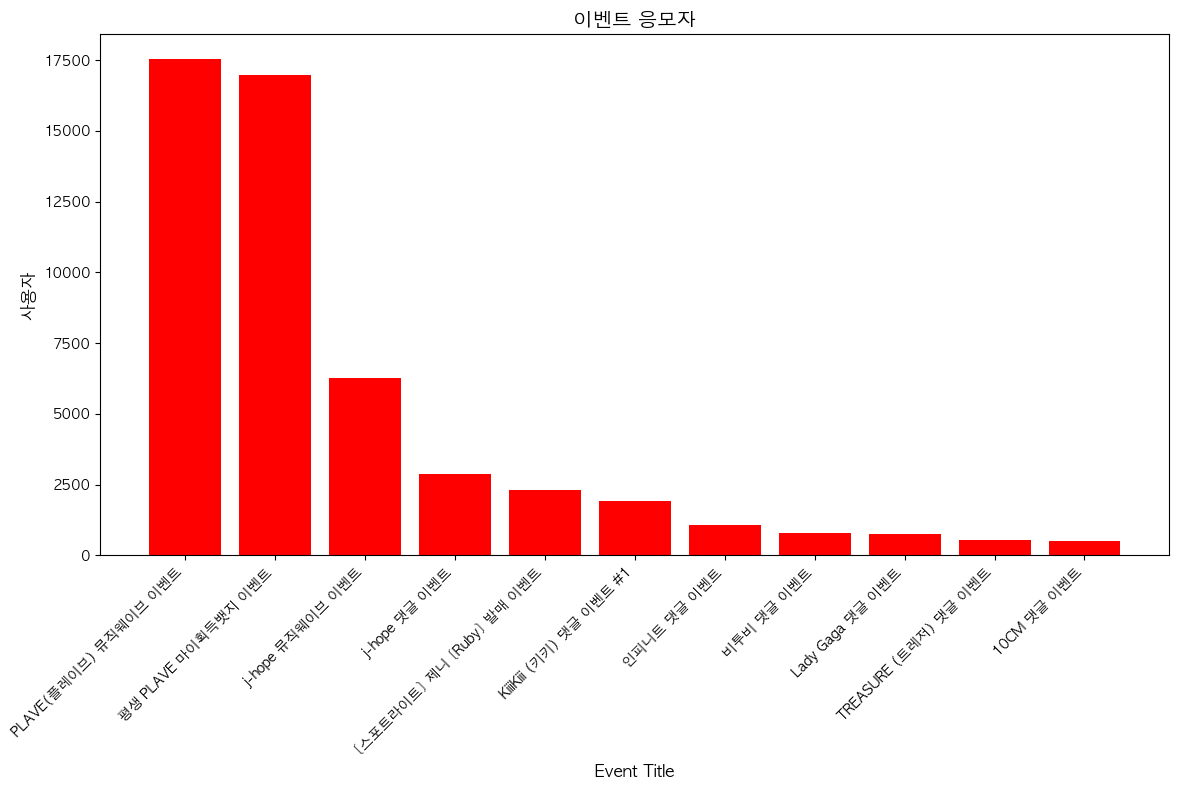

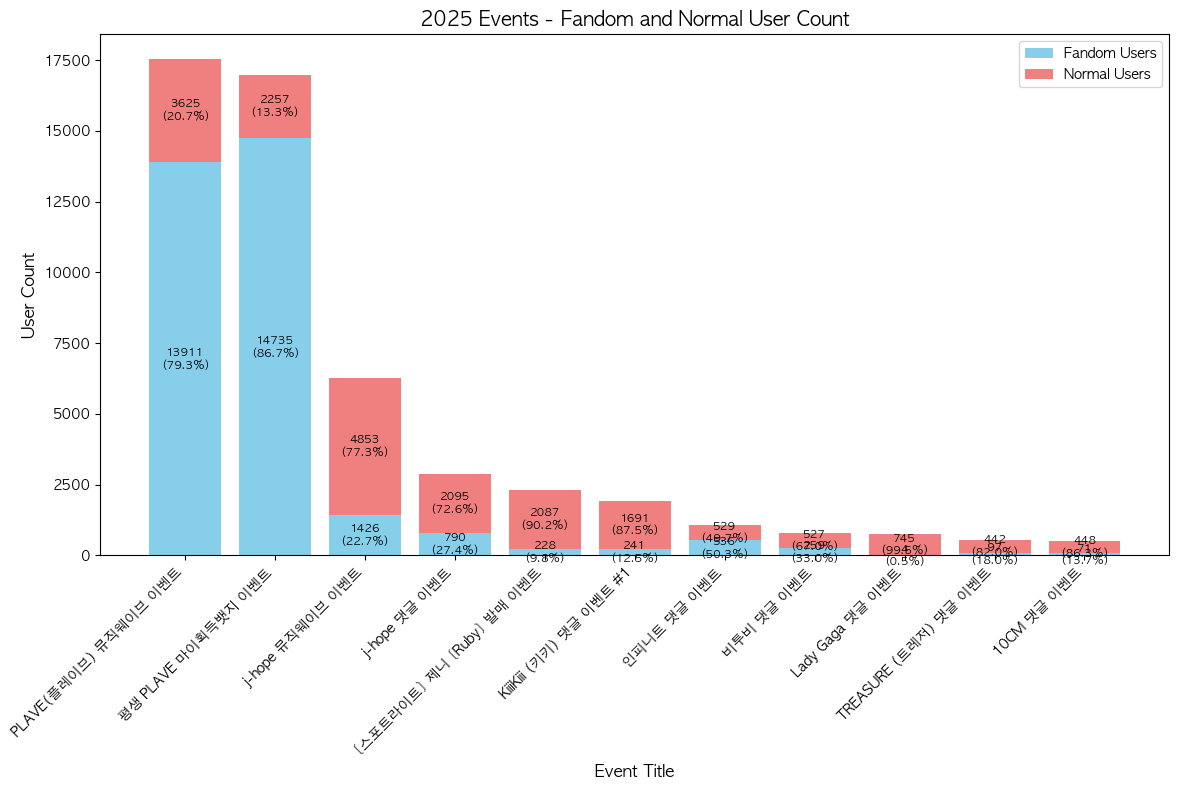

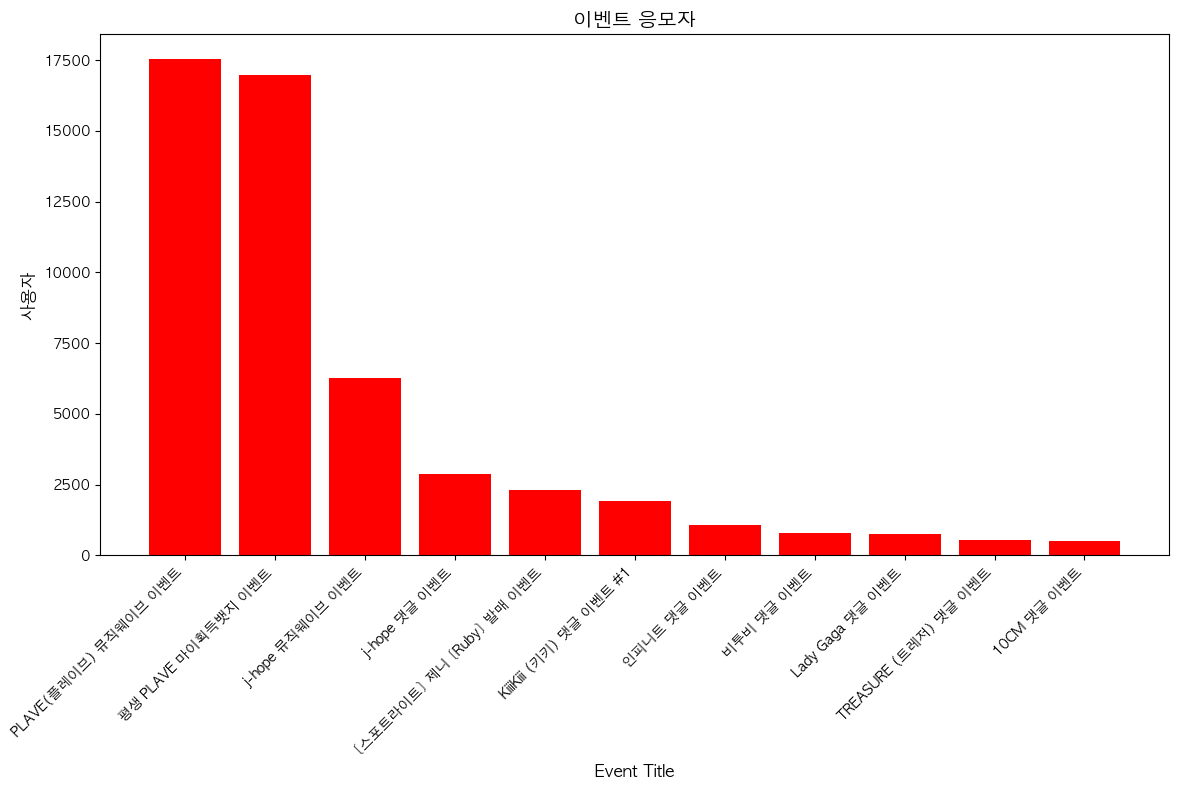

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2025년도 이벤트 필터링
event_user_data['start_date'] = pd.to_datetime(event_user_data['start_date'])  # 날짜 형식 변환
events_2025 = event_user_data[event_user_data['start_date'].dt.year == 2025]  # 2025년도 필터링

# 이벤트별 ent_user_cnt 시각화
plt.figure(figsize=(12, 8))
plt.bar(events_2025['title'], events_2025['ent_user_cnt'], color='red')
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('사용자', fontsize=12)
plt.title('이벤트 응모자', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 데이터 준비
titles = events_2025['title']
fandom_users = events_2025['ent_fandom_user_cnt']
normal_users = events_2025['ent_normal_user_cnt']

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))

# 스택형 막대 그래프
bar1 = ax.bar(titles, fandom_users, label='Fandom Users', color='skyblue')
bar2 = ax.bar(titles, normal_users, bottom=fandom_users, label='Normal Users', color='lightcoral')

# 데이터 라벨링
for i, (fandom, normal) in enumerate(zip(fandom_users, normal_users)):
    total = fandom + normal
    ax.text(i, fandom / 2 - 5, f'{fandom}\n({fandom / total * 100:.1f}%)', ha='center', va='center', fontsize=8, color='black')  # 팬덤 사용자 라벨
    ax.text(i, fandom + normal / 2 + 5, f'{normal}\n({normal / total * 100:.1f}%)', ha='center', va='center', fontsize=8, color='black')  # 일반 사용자 라벨


# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('User Count', fontsize=12)
ax.set_title('2025 Events - Fandom and Normal User Count', fontsize=14)
ax.set_xticks(range(len(titles)))
ax.set_xticklabels(titles, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()

# 이벤트별 ent_user_cnt 시각화
plt.figure(figsize=(12, 8))
plt.bar(events_2025['title'], events_2025['ent_user_cnt'], color='red')
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('사용자', fontsize=12)
plt.title('이벤트 응모자', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

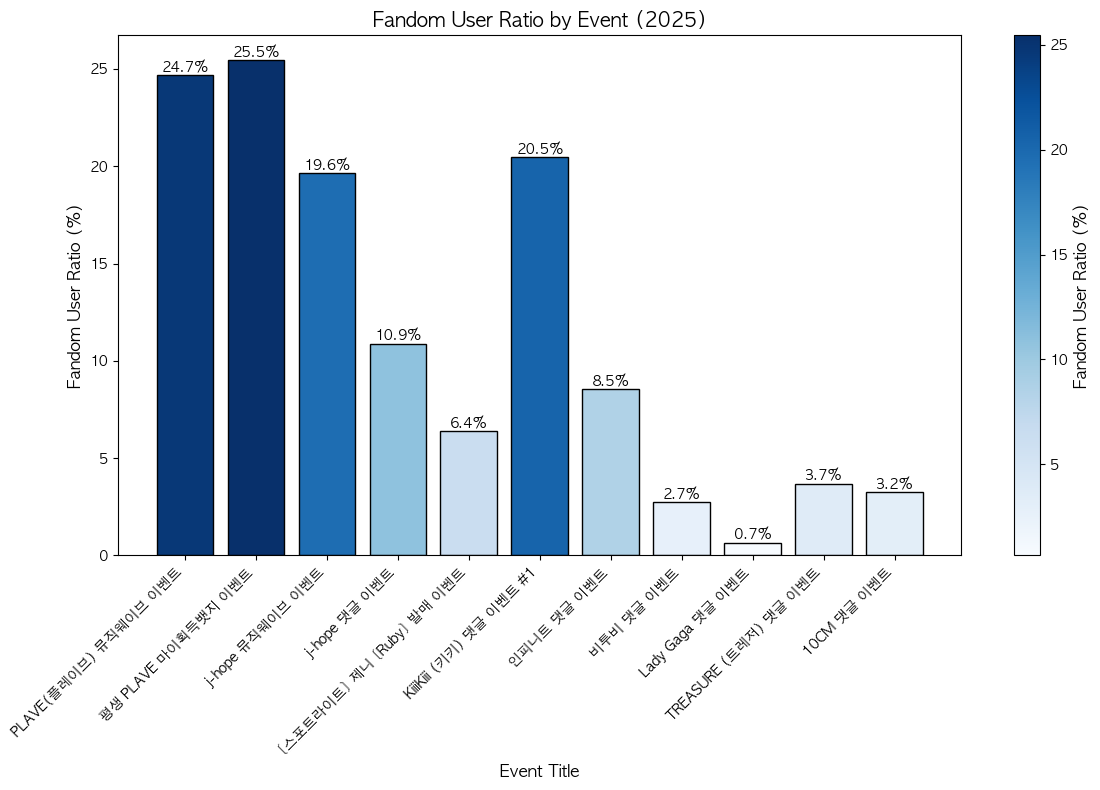

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# fandom_user_ratio 값의 색상 그라데이션 설정
norm = Normalize(vmin=events_2025['fandom_user_ratio'].min(), vmax=events_2025['fandom_user_ratio'].max())
cmap = plt.cm.Blues  # 색상 맵 설정 (Blues)

# 막대 색상 설정
colors = cmap(norm(events_2025['fandom_user_ratio']))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))  # Axes 객체 생성
bars = ax.bar(events_2025['title'], events_2025['fandom_user_ratio'], color=colors, edgecolor='black')

# 데이터 라벨 추가
for bar, value in zip(bars, events_2025['fandom_user_ratio']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# 컬러바 추가
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # ax를 명시적으로 지정
cbar.set_label('Fandom User Ratio (%)', fontsize=12)

# 그래프 꾸미기
ax.set_xlabel('Event Title', fontsize=12)
ax.set_ylabel('Fandom User Ratio (%)', fontsize=12)
ax.set_title('Fandom User Ratio by Event (2025)', fontsize=14)
ax.set_xticks(range(len(events_2025['title'])))
ax.set_xticklabels(events_2025['title'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## 이벤트 응모자 해지방어
- 이벤트 페이지 방문자 들의 해지사상품건수 밎 재가입자비율
- 동일 기간 이벤트 비교.
- 과거 플레이브 이벤트(24년 8월 뮤직웨이브,25년2월 뮤지구에이브)와 비교

In [118]:
# 동일기간 및 과거 이벤트 기준 참여 상품 및 해지상품 데이터
event_prod_query = '''
with event_df as(
select seq
         , event_id
         , parent_event_id
         , title
         , start_date
         , end_date
         , category
         , entry_target
         , winner_noti_date
         , gift_dp_name
         , case
            when event_id IN (36723,36341,36683) then 3207401
            when event_id = 36742 then 725984
            when event_id = 36746 then 468244
            when event_id = 36750 then 725984
            when event_id = 36749 then 995173
            when event_id = 36757 then 4099078
            when event_id = 36741 then 476181
            when event_id = 36740 then 647971
            when event_id = 36743 then 253688
            when event_id = 36747 then 2880278
          end artist_id  
         , case
            when event_id = 36723 then '뱃지이벤트'
            when event_id in (36742,36341,36683) then '뮤직웨이브'
            when event_id = 36746 then '에디션M'
            when event_id = 36750 then '매거진이벤트'
            when event_id = 36749 then '스포트라이트'
            when event_id = 36757 then '하이라이징'
            when event_id = 36741 then '매거진이벤트'
            when event_id = 36740 then '매거진이벤트'
            when event_id = 36743 then '매거진이벤트'
            when event_id = 36747 then '아티스트는뭘듣니'
           end event_type    
         , case
            when event_id = 36723 then 1000000386
            when event_id in (36742,36341,36683) then 1000003041
            when event_id = 36746 then 1000000498
            when event_id = 36750 then 1000000498
            when event_id = 36749 then 1000002847
            when event_id = 36757 then 1000000498
            when event_id = 36741 then 1000000498
            when event_id = 36740 then 1000000498
            when event_id = 36743 then 1000000498
            when event_id = 36747 then 1000000498
           end menu_id    
         , case
            when event_id = 36723 then '36723'
            when event_id = 36742 then '571'
            when event_id = 36746 then '15872'
            when event_id = 36750 then '15901'
            when event_id = 36749 then '152'
            when event_id = 36757 then '15911'
            when event_id = 36741 then '15893'
            when event_id = 36740 then '15892'
            when event_id = 36743 then '15894'
            when event_id = 36747 then '15897'
            when event_id in (36341,36683) then '1945'
           end conts_id  
    from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO 
    where melon_short_date_format(start_date) > '20240201'
    and melon_short_date_format(end_date) < '20250322'
    and entry_target = 'PROD'
    and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
    --and category = '100065' /* 이벤트 종류 (100065 : 멜론 이벤트, 100066 : 앨범이벤트, 100067 : 공연이벤트, 100068 : 뮤직스토리이벤트, 100069 : 스토리 이벤트, 100070 : 패밀리앱 이벤트, 100071 : MWK 이벤트) */
), prod_df as(
        select f1.dt
             , f1.user_mkey
             , f1.first_buy_no
             , f1.buy_no
             , f1.prod_prt_cd
             , f1.out_yn
             , f1.out_dt
             , if(f2.user_mkey is null,'N','Y') as rejoin_yn
        from(
        select t1.dt
             , t1.user_mkey
             , t1.first_buy_no
             , t1.buy_no
             , t1.prod_prt_cd
             , t1.prod_attr_cd
             , if(t2.lst_buy_no is not null,'Y','N') as out_yn
             , t2.dt as out_dt
        from(     
            SELECT A.DT
                 , A.USER_MKEY
                 , A.FIRST_BUY_NO
                 , A.BUY_NO
                 , B.PROD_PRT_CD
                 , B.prod_attr_cd
                 , A.at_buy_cnt
                 , RANK() OVER(PARTITION BY A.USER_MKEY,A.DT ORDER BY B.PROD_PRT_CD,B.prod_attr_cd,A.first_buy_no desc) as rnk -- 티켓,클럽 2개 모두 보유시 클럽 상품, MP3, 스트리밍 다있으면 스트리밍 상품 가져오기
            FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT A
            JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD B ON (A.PROD_ID = B.PROD_ID)
            JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.SBY_BUY_TB_RO C ON (A.BUY_NO = C.BUY_NO)
            WHERE (A.log_date between '20250228' and '20250321' or A.log_date between '20250203' and '20250216' or A.log_date between '20240820' and '20240901')
            AND A.PROD_STAT_CD NOT IN (3401, 3901)
            AND A.DT <= A.VLD_END_DATE -- DCB 일시정지 제외
            AND B.PROD_ATTR_CD NOT IN (10040, 10050) -- 종량,기타 제외
            AND B.PROD_SELL_PRT_CD = 60000 -- B2C
            --AND B.PROD_PRT_CD IN (20000,20010) -- 클럽상품,티켓상품
            AND B.PROD_PRT_CD IN (20000) -- 클럽상품
            AND A.PF_YN = 1
            GROUP BY 1, 2, 3, 4, 5, 6, 7
        ) t1
        left join hadoop_kent.melon_da_stat_production.a_out_prod_dtl_tbh t2 on t1.buy_no = t2.lst_buy_no
        where rnk = 1
        ) f1
        left join(
            select dt
                 , user_mkey
                 , first_buy_no
                 , buy_no
            FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT T1
            JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD T2  ON (T1.PROD_ID = T2.PROD_ID)
            JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.CPT_PROD_TB_RO T4 ON (T1.PROD_ID = T4.PROD_ID)
            WHERE (T1.log_date between '20250228' and '20250329' or T1.log_date between '20250203' and '20250224' or T1.log_date between '20240820' and '20240908')
              AND DATE_FORMAT(T1.DT, '%Y%m%d') BETWEEN '20220101' AND '20241231'
              AND PF_YN = 1
              AND T2.PROD_ATTR_CD NOT IN (10040, 10050)
              AND T1.PROD_JOIN_PRT_CD IN (1100, 1200, 1201, 1205, 1203, 1206, 1207) /*신규 로직에서 1206 제외*/ 
              AND T2.PROD_SELL_PRT_CD IN (60000) /*B2C*/
              AND PROD_PRT_CD = 20000  /*클럽 상품*/
            GROUP BY 1, 2, 3, 4
        ) f2 on f1.user_mkey = f2.user_mkey and f1.out_yn = 'Y' and date_diff('day',f1.dt,f2.dt) < 8
)


    --select A.event_id
    --     , A.member_key
    --     , A.reg_date
    --     , C.first_buy_no
    --     , C.buy_no
    --     , C.out_yn
    --     , C.out_dt
    
    select A.event_id
         , D.title
         , date(D.start_date) as start_date
         , date(D.end_date) as end_date
         , count(distinct A.member_key) as ent_user_cnt
         , count(distinct C.buy_no) as prod_cnt
         , count(distinct if(C.out_yn = 'Y',C.buy_no)) as out_prod_cnt     
         , cast(count(distinct if(C.out_yn = 'Y',C.buy_no)) as double)/cast(count(distinct C.buy_no) as double)*100 as out_prod_ratio
         , count(distinct if(C.out_yn = 'Y' and C.rejoin_yn ='Y',C.buy_no)) as rejoin_prod_cnt     
         , cast(count(distinct if(C.out_yn = 'Y' and C.rejoin_yn ='Y',C.buy_no)) as double)/cast(count(distinct if(C.out_yn = 'Y',C.buy_no)) as double)*100 as rejoin_prod_ratio
    from (
        select event_id
             , member_key
             , reg_date
             , case
                when event_id IN (36723,36341,36683) then 3207401
                when event_id = 36742 then 725984
                when event_id = 36746 then 468244
                when event_id = 36750 then 725984
                when event_id = 36749 then 995173
                when event_id = 36757 then 4099078
                when event_id = 36741 then 476181
                when event_id = 36740 then 647971
                when event_id = 36743 then 253688
                when event_id = 36747 then 2880278
              end artist_id  
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO A
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
        group by 1,2,3,4
    ) A
    left join (
        select artist_id
             , member_key
             , log_date
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
        where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        group by 1,2,3
    ) B on melon_short_date_format(A.reg_date) = B.log_date and A.artist_id = B.artist_id and A.member_key = B.member_key
    left join prod_df C on A.member_key = C.user_mkey and date(A.reg_date) = C.dt
    left join event_df D on A.event_id = D.event_id
    group by 1,2,3,4
    union all
    select 0
         , '이벤트미참여자'
         , null
         , null
         , 0 as ent_user_cnt
         , count(distinct first_buy_no) as prod_cnt
         , count(distinct if(out_yn = 'Y',first_buy_no)) as out_prod_cnt     
         , cast(count(distinct if(out_yn = 'Y',first_buy_no)) as double)/cast(count(distinct first_buy_no) as double)*100 as out_prod_ratio
         , count(distinct if(out_yn = 'Y' and rejoin_yn ='Y',first_buy_no)) as rejoin_prod_cnt     
         , cast(count(distinct if(out_yn = 'Y' and rejoin_yn ='Y',first_buy_no)) as double)/cast(count(distinct if(out_yn = 'Y',first_buy_no )) as double)*100 as rejoin_prod_ratio
    from prod_df A
    left join(
        select member_key             
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO A
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36341,36683)
        group by 1
    ) B ON A.user_mkey = B.member_key
    where B.member_key is null
    
    
    
'''

cur.execute(event_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_df.head()

,event_id,title,start_date,end_date,ent_user_cnt,prod_cnt,out_prod_cnt,out_prod_ratio,rejoin_prod_cnt,rejoin_prod_ratio
0,36757,KiiiKiii (키키) 댓글 이벤트 #1,2025-03-12,2025-03-18,1932,1910,360,18.848168,40,11.111111
1,36746,10CM 댓글 이벤트,2025-03-06,2025-03-20,519,516,76,14.728682,7,9.210526
2,36747,TREASURE (트레저) 댓글 이벤트,2025-03-07,2025-03-21,539,528,76,14.393939,11,14.473684
3,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,2025-03-07,2025-03-20,2315,2294,310,13.513514,27,8.709677
4,36740,비투비 댓글 이벤트,2025-03-05,2025-03-19,786,774,105,13.565891,10,9.523810


In [119]:
event_prod_df

,event_id,title,start_date,end_date,ent_user_cnt,prod_cnt,out_prod_cnt,out_prod_ratio,rejoin_prod_cnt,rejoin_prod_ratio
0,36757,KiiiKiii (키키) 댓글 이벤트 #1,2025-03-12,2025-03-18,1932,1910,360,18.848168,40,11.111111
1,36746,10CM 댓글 이벤트,2025-03-06,2025-03-20,519,516,76,14.728682,7,9.210526
2,36747,TREASURE (트레저) 댓글 이벤트,2025-03-07,2025-03-21,539,528,76,14.393939,11,14.473684
3,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,2025-03-07,2025-03-20,2315,2294,310,13.513514,27,8.709677
4,36740,비투비 댓글 이벤트,2025-03-05,2025-03-19,786,774,105,13.565891,10,9.523810
5,36742,j-hope 뮤직웨이브 이벤트,2025-03-07,2025-03-21,6279,6088,709,11.645861,64,9.026798
6,36743,Lady Gaga 댓글 이벤트,2025-03-07,2025-03-21,749,747,65,8.701473,9,13.846154
7,36683,PLAVE(플레이브) 뮤직웨이브 이벤트,2025-02-03,2025-02-16,17536,16374,2599,15.872725,434,16.698730
8,36750,j-hope 댓글 이벤트,2025-03-07,2025-03-21,2885,2852,357,12.517532,34,9.523810
9,36723,평생 PLAVE 마이획득뱃지 이벤트,2025-02-28,2025-03-21,16992,16687,2226,13.339726,304,13.656783


/var/folders/qw/6lks7c5d14scf7qtctm8m6jh0000gn/T/ipykernel_23472/4219269315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'])  # 날짜 형식 변환


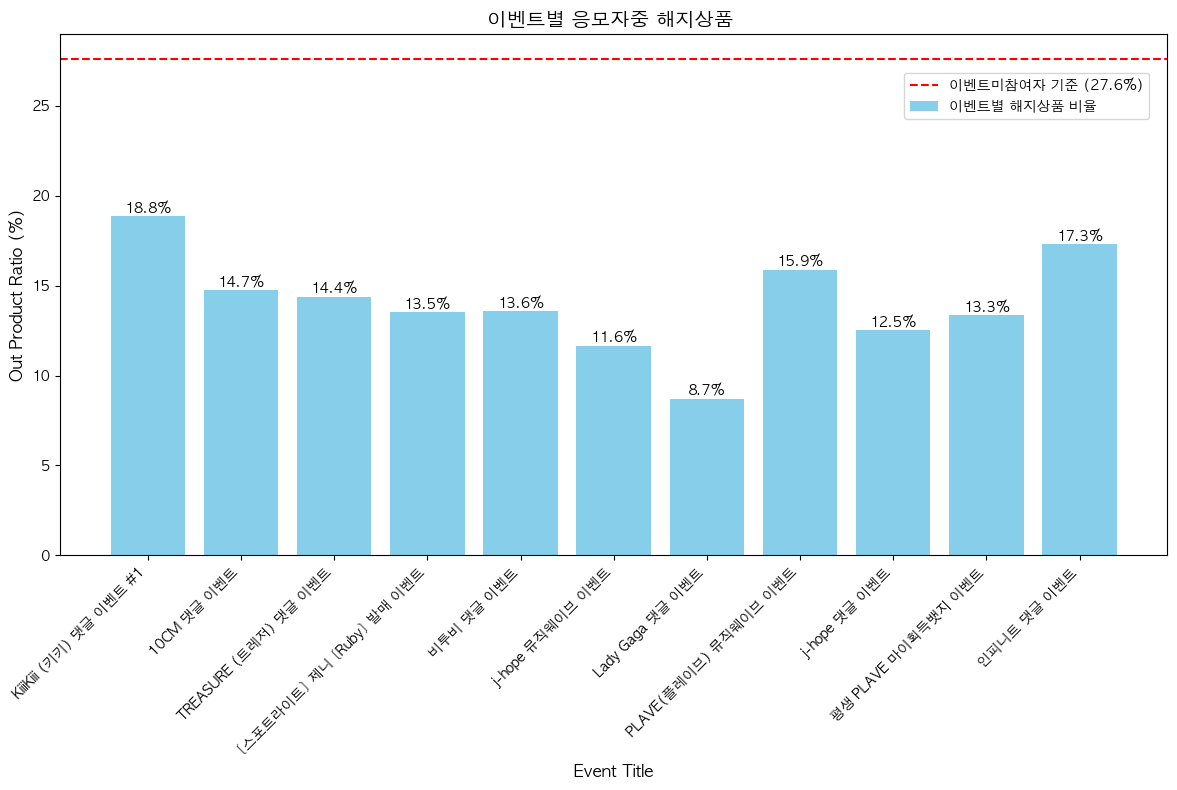

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# 이벤트미참여자 제외
filtered_df = event_prod_df[event_prod_df['title'] != '이벤트미참여자']
filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'])  # 날짜 형식 변환
filtered_df = filtered_df[filtered_df['start_date'].dt.year == 2025]  # 2025년도 필터링


# 이벤트미참여자의 out_prod_ratio 값 추출
non_participant_ratio = event_prod_df.loc[event_prod_df['title'] == '이벤트미참여자', 'out_prod_ratio'].values[0]

# 그래프 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_df['title'], filtered_df['out_prod_ratio'], color='skyblue', label='이벤트별 해지상품 비율')

# 수평선 추가
plt.axhline(y=non_participant_ratio, color='red', linestyle='--', label=f'이벤트미참여자 기준 ({non_participant_ratio:.1f}%)')

# 데이터 라벨 추가
for bar, value in zip(bars, filtered_df['out_prod_ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('Out Product Ratio (%)', fontsize=12)
plt.title('이벤트별 응모자중 해지상품 ', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(0.99, 0.94))
plt.show()



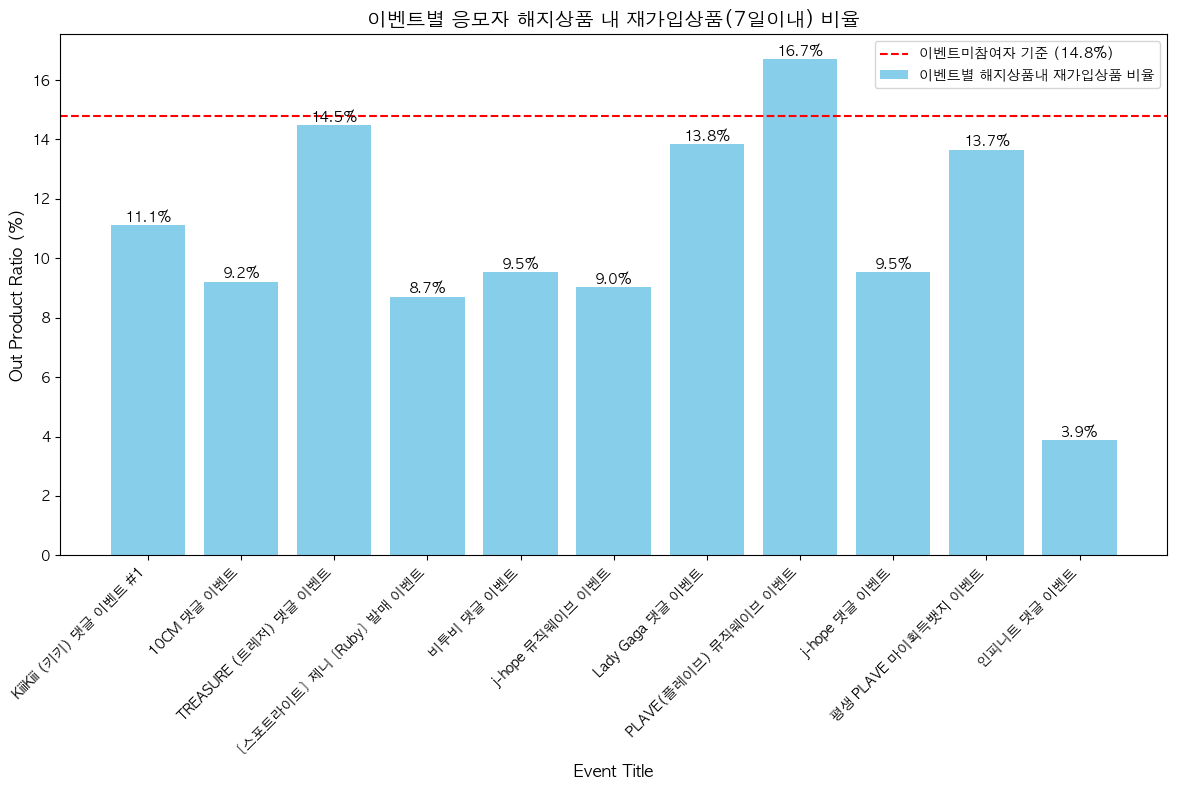

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# 이벤트미참여자 제외
filtered_df = event_prod_df[event_prod_df['title'] != '이벤트미참여자'].copy()  # .copy() 추가

# start_date를 datetime 형식으로 변환
if not pd.api.types.is_datetime64_any_dtype(filtered_df['start_date']):
    filtered_df['start_date'] = pd.to_datetime(filtered_df['start_date'], errors='coerce')  # datetime 변환

# 2025년도 데이터 필터링
filtered_df = filtered_df[filtered_df['start_date'].dt.year == 2025]

# 이벤트미참여자의 rejoin_prod_ratio 값 추출
non_participant_ratio = event_prod_df.loc[event_prod_df['title'] == '이벤트미참여자', 'rejoin_prod_ratio'].values[0]

# 그래프 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_df['title'], filtered_df['rejoin_prod_ratio'], color='skyblue', label='이벤트별 해지상품내 재가입상품 비율')

# 수평선 추가
plt.axhline(y=non_participant_ratio, color='red', linestyle='--', label=f'이벤트미참여자 기준 ({non_participant_ratio:.1f}%)')

# 데이터 라벨 추가
for bar, value in zip(bars, filtered_df['rejoin_prod_ratio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('Event Title', fontsize=12)
plt.ylabel('Out Product Ratio (%)', fontsize=12)
plt.title('이벤트별 응모자 해지상품 내 재가입상품(7일이내) 비율', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

### 이벤트별 최초신규 및 재가입 유입 효과 비교

In [106]:
# 동일기간 및 과거 이벤트 기준 참여 상품 및 해지상품 데이터
event_prod_join_prt_query = '''
select event_id
     , title
     , count(distinct member_key) as ent_user_cnt
     , count(distinct buy_no) as ent_user_prod_cnt
     , count(distinct if(prod_group = '재가입신규(7일이내)',buy_no)) as rejoin_prod_7day_cnt
     , count(distinct if(prod_group = '재가입신규(7일이후)',buy_no)) as rejoin_prod_7day_after_cnt    
     , count(distinct if(prod_group = '최초신규',buy_no)) as first_prod_cnt
     , count(distinct if(prod_group = '기존상품',buy_no)) as keep_prod_cnt
from(
    select A.event_id
         , D.title 
         , A.member_key
         , if(B.member_key is not null,'Y','N') as fandom_yn
         , C.buy_no
         , C.prod_group
         , C.first_buy_no
         , C.at_buy_cnt
         , C.out_dt
         , C.non_prod_term
    from(
        select event_id
             , member_key
             , reg_date
             , case
                when event_id IN (36723,36341,36683) then 3207401
                when event_id = 36742 then 725984
                when event_id = 36746 then 468244
                when event_id = 36750 then 725984
                when event_id = 36749 then 995173
                when event_id = 36757 then 4099078
                when event_id = 36741 then 476181
                when event_id = 36740 then 647971
                when event_id = 36743 then 253688
                when event_id = 36747 then 2880278
              end artist_id  
        from HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_ENTRY_MAIN_RO 
        where (melon_short_date_format(reg_date) between '20250227' and '20250322' or melon_short_date_format(reg_date) between '20250203' and '20250216' or melon_short_date_format(reg_date) between '20240820' and '20240901')
        and event_id in (36723,36742,36750,36749,36757,36741,36740,36743,36747,36746,36683)
        group by 1,2,3,4
    ) A
    left join (
        select artist_id
             , member_key
             , log_date
        from HADOOP_KENT.MELON_MA_PROD_PRODUCTION.A_USER_ARTIST_FANDOM_TRGT_DAY 
        where (log_date between '20250228' and '20250321' or log_date between '20250203' and '20250216' or log_date between '20240820' and '20240901')
        AND (CONTAINS(FANDOM_TYPE,'A')=true OR CONTAINS(FANDOM_TYPE,'B')=true OR CONTAINS(FANDOM_TYPE,'C')=true)
        group by 1,2,3
    ) B on melon_short_date_format(A.reg_date) = B.log_date and A.artist_id = B.artist_id and A.member_key = B.member_key
    left join(
        select dt
             , user_mkey
             , first_buy_no
             , buy_no
             , vld_start_date
             , at_buy_cnt
             , case
                when at_buy_cnt = 0 and out_dt is not null and non_prod_term < 7 then '재가입신규(7일이내)' 
                when at_buy_cnt = 0 and out_dt is not null and non_prod_term > 6 then '재가입신규(7일이후)' 
                when at_buy_cnt = 0 and out_dt is null then '최초신규' 
                when at_buy_cnt > 0 then '기존상품'
               end as prod_group
             , prod_prt_cd
             , prod_attr_cd
             , out_dt
             , non_prod_term
             , rnk
        from(     
        select t1.dt
             , t1.user_mkey
             , t1.first_buy_no
             , t1.buy_no
             , t1.vld_start_date
             , t1.at_buy_cnt
             , t1.prod_prt_cd
             , t1.prod_attr_cd
             , t2.dt as out_dt
             , date_diff('day',t2.dt,t1.vld_start_date) as non_prod_term
             , rank() over(partition by t1.user_mkey,t1.dt,t1.first_buy_no order by t2.dt desc) as rnk
        from(
        select dt
             , user_mkey
             , first_buy_no
             , buy_no
             , vld_start_date
             , at_buy_cnt
             , prod_prt_cd
             , prod_attr_cd
        from(     
        SELECT A.DT
             , A.USER_MKEY
             , A.FIRST_BUY_NO
             , A.BUY_NO
             , date(vld_strt_date) as vld_start_date
             , B.PROD_PRT_CD
             , B.prod_attr_cd
             , A.at_buy_cnt
             , RANK() OVER(PARTITION BY A.DT,A.USER_MKEY ORDER BY PROD_PRT_CD,prod_attr_cd,A.at_buy_cnt desc) as rnk 
        FROM HADOOP_KENT.MELON_MA_STAT_PRODUCTION.F_PROD_USER_FXMT_DT A
        JOIN HADOOP_KENT.MELON_MA_STAT_PRODUCTION.D_PROD B ON (A.PROD_ID = B.PROD_ID)
        JOIN HADOOP_KENT.MELON_ODS_COMMERCE_PRODUCTION.SBY_BUY_TB_RO C ON (A.BUY_NO = C.BUY_NO)
        WHERE (A.log_date between '20250228' and '20250321' or A.log_date between '20250203' and '20250216')
        AND A.PROD_STAT_CD NOT IN (3401, 3901)
        AND A.DT <= A.VLD_END_DATE -- DCB 일시정지 제외
        AND B.PROD_ATTR_CD NOT IN (10040, 10050) -- 종량,기타 제외
        AND B.PROD_SELL_PRT_CD = 60000 -- B2C
        AND B.PROD_PRT_CD = 20000 --IN (20000,20010) -- 클럽상품,티켓상품
        AND A.PF_YN = 1
        GROUP BY 1, 2, 3, 4, 5, 6,7, 8
        )
        where rnk = 1
        ) t1
        left join hadoop_kent.melon_da_stat_production.a_out_prod_dtl_tbh t2 on t1.vld_start_date > t2.dt and t1.user_mkey = t2.user_mkey and t1.at_buy_cnt = 0
        )
        where rnk = 1
    ) C on A.member_key = C.user_mkey and date(A.reg_date) = C.dt
    left join HADOOP_KENT.MELON_ODS_POC_PRODUCTION.EVENT_INFO_RO  D on A.event_id = D.event_id
    group by 1,2,3,4,5,6,7,8,9,10
)
group by 1,2
order by 3 desc
    
'''

cur.execute(event_prod_join_prt_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_join_prt_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_join_prt_df.head()

,event_id,title,ent_user_cnt,ent_user_prod_cnt,rejoin_prod_7day_cnt,rejoin_prod_7day_after_cnt,first_prod_cnt,keep_prod_cnt
0,36683,PLAVE(플레이브) 뮤직웨이브 이벤트,17536,16382,479,2800,1462,11641
1,36723,평생 PLAVE 마이획득뱃지 이벤트,16992,16684,878,1835,1242,12729
2,36742,j-hope 뮤직웨이브 이벤트,6279,6089,155,608,101,5225
3,36750,j-hope 댓글 이벤트,2885,2854,81,272,86,2415
4,36749,[스포트라이트] 제니 [Ruby] 발매 이벤트,2315,2294,87,135,50,2022


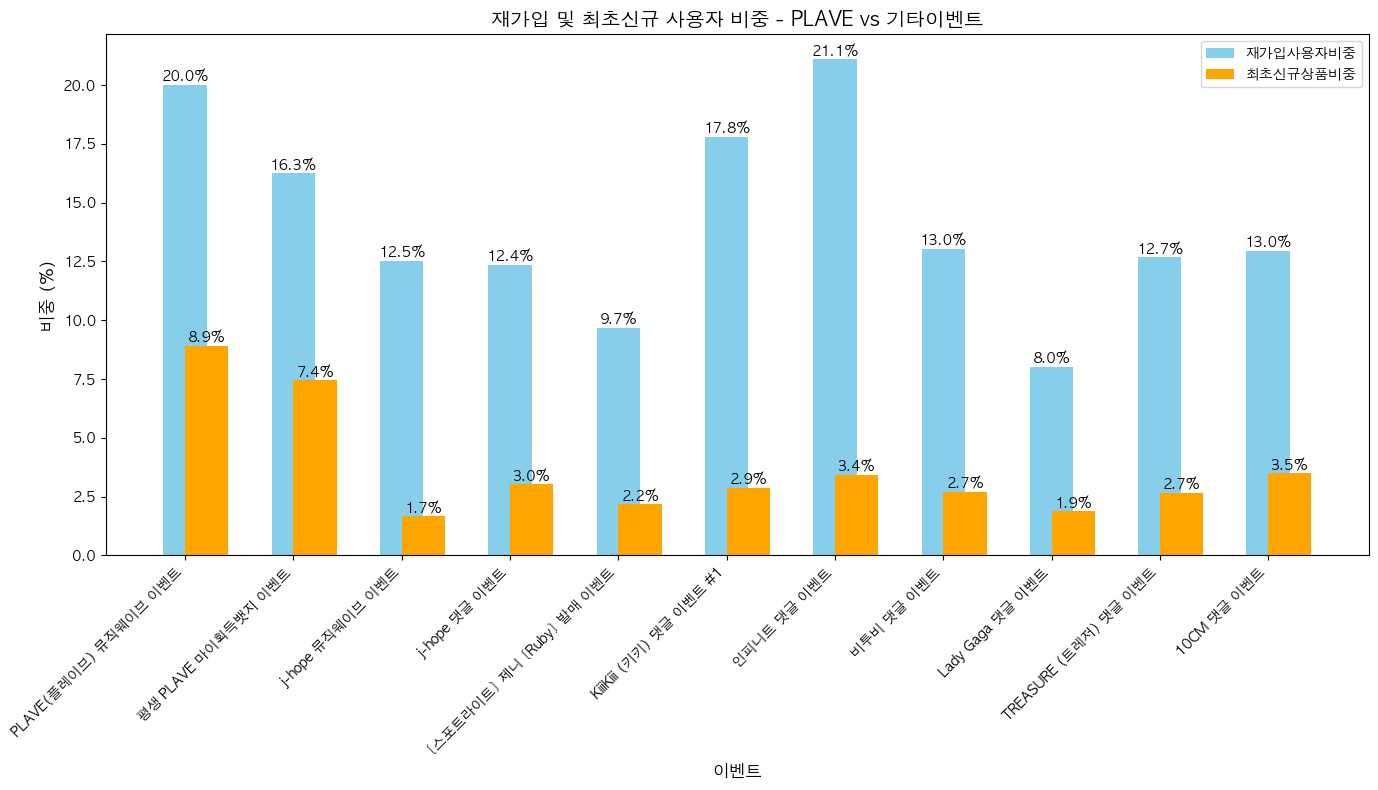

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Rejoin Ratio와 First Join Ratio 계산
event_prod_join_prt_df['rejoin_ratio'] = (
    (event_prod_join_prt_df['rejoin_prod_7day_cnt'] + event_prod_join_prt_df['rejoin_prod_7day_after_cnt']) /
    event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

event_prod_join_prt_df['first_join_ratio'] = (
    event_prod_join_prt_df['first_prod_cnt'] / event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

# PLAVE 관련 이벤트와 비교군 이벤트 필터링
plave_events = event_prod_join_prt_df[
    event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

comparison_events = event_prod_join_prt_df[
    ~event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

# PLAVE 이벤트와 비교군 이벤트 병합
plave_events['group'] = 'PLAVE'
comparison_events['group'] = 'Comparison'
combined_events = pd.concat([plave_events, comparison_events])

# 막대 그래프 생성
plt.figure(figsize=(14, 8))
x = range(len(combined_events))
colors_rejoin_7day = ['skyblue' if group == 'PLAVE' else 'lightgray' for group in combined_events['group']]
colors_first_join = ['orange' if group == 'PLAVE' else 'gainsboro' for group in combined_events['group']]


# Rejoin Ratio 막대
bars1 = plt.bar(x, combined_events['rejoin_ratio'], width=0.4, label='재가입사용자비중', color='skyblue', align='center')

# First Join Ratio 막대
bars2 = plt.bar(x, combined_events['first_join_ratio'], width=0.4, label='최초신규상품비중', color='orange', align='edge')

# 데이터 라벨 추가
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(x, combined_events['title'], rotation=45, ha='right', fontsize=10)
plt.xlabel('이벤트', fontsize=12)
plt.ylabel('비중 (%)', fontsize=12)
plt.title('재가입 및 최초신규 사용자 비중 - PLAVE vs 기타이벤트', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

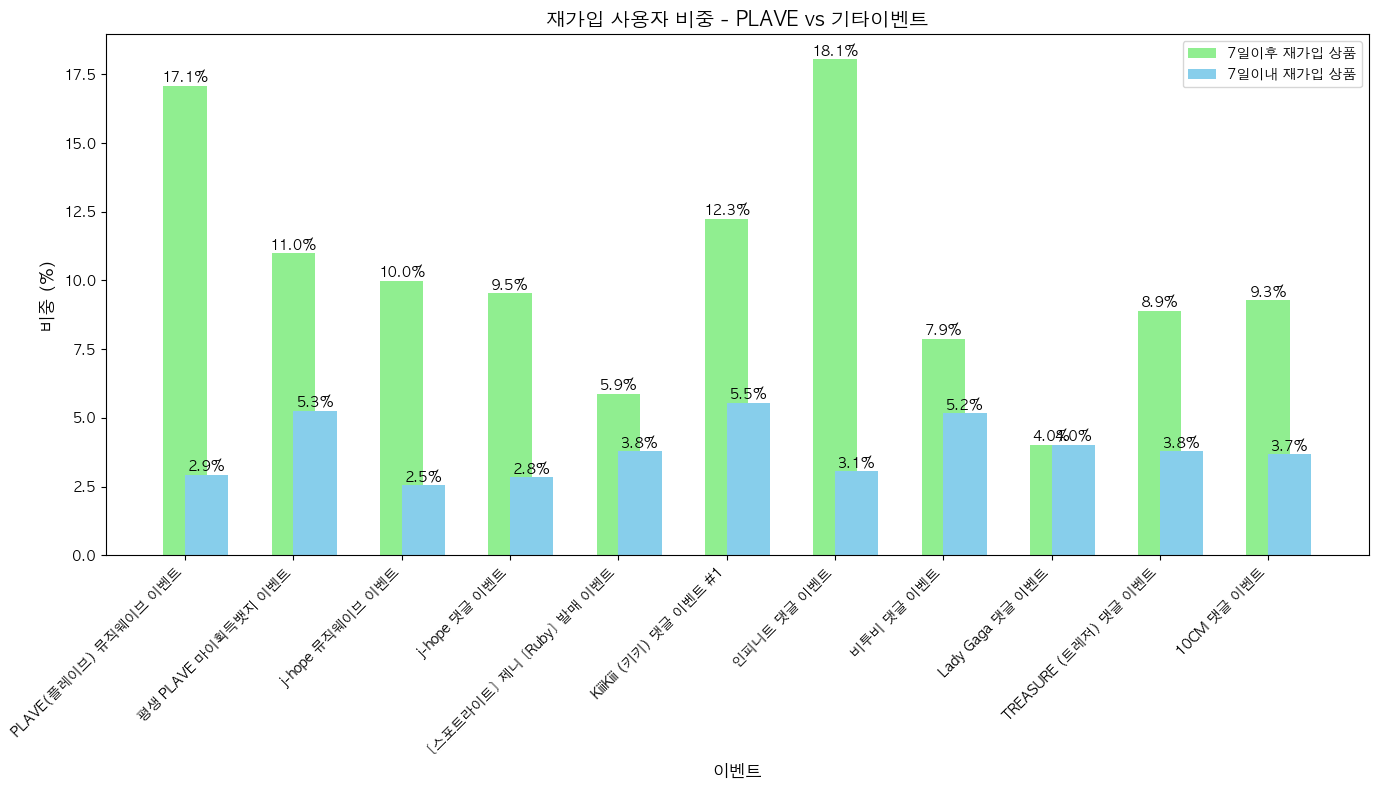

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Rejoin Ratio와 First Join Ratio 계산
event_prod_join_prt_df['rejoin_prod_7day_ratio'] = (
    event_prod_join_prt_df['rejoin_prod_7day_cnt']/ event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

event_prod_join_prt_df['rejoin_prod_7day_after_ratio'] = (
    event_prod_join_prt_df['rejoin_prod_7day_after_cnt'] / event_prod_join_prt_df['ent_user_prod_cnt']
) * 100

# PLAVE 관련 이벤트와 비교군 이벤트 필터링
plave_events = event_prod_join_prt_df[
    event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

comparison_events = event_prod_join_prt_df[
    ~event_prod_join_prt_df['title'].str.contains('PLAVE|플레이브')
].copy()

# PLAVE 이벤트와 비교군 이벤트 병합
plave_events['group'] = 'PLAVE'
comparison_events['group'] = 'Comparison'
combined_events = pd.concat([plave_events, comparison_events])

# 막대 그래프 생성
plt.figure(figsize=(14, 8))
x = range(len(combined_events))
colors_rejoin_7day = ['skyblue' if group == 'PLAVE' else 'lightgray' for group in combined_events['group']]
colors_rejoin_7day_after = ['lightgreen' if group == 'PLAVE' else 'gainsboro' for group in combined_events['group']]

# 7일이후 재가입 상품 비중 막대
bars2 = plt.bar(x, combined_events['rejoin_prod_7day_after_ratio'], width=0.4, label='7일이후 재가입 상품', color='lightgreen', align='center')

# 7일이내 재가입 상품 비중 막대
bars1 = plt.bar(x, combined_events['rejoin_prod_7day_ratio'], width=0.4, label='7일이내 재가입 상품', color='skyblue', align='edge')


# 데이터 라벨 추가
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# 그래프 꾸미기
plt.xticks(x, combined_events['title'], rotation=45, ha='right', fontsize=10)
plt.xlabel('이벤트', fontsize=12)
plt.ylabel('비중 (%)', fontsize=12)
plt.title('재가입 사용자 비중 - PLAVE vs 기타이벤트', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
# 재가입신규 - 상품미보유기간에 따른 사용자 분포
event_prod_rejoin_prod_query = '''
select prod_group
      , non_prod_term
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where prod_group in ('재가입신규(7일이후)','재가입신규(7일이내)')
group by 1,2
order by 1,2
    
'''

cur.execute(event_prod_rejoin_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_rejoin_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_rejoin_prod_df.head()

,prod_group,non_prod_term,cnt
0,재가입신규(7일이내),1,824
1,재가입신규(7일이내),2,73
2,재가입신규(7일이내),3,28
3,재가입신규(7일이내),4,33
4,재가입신규(7일이내),5,20


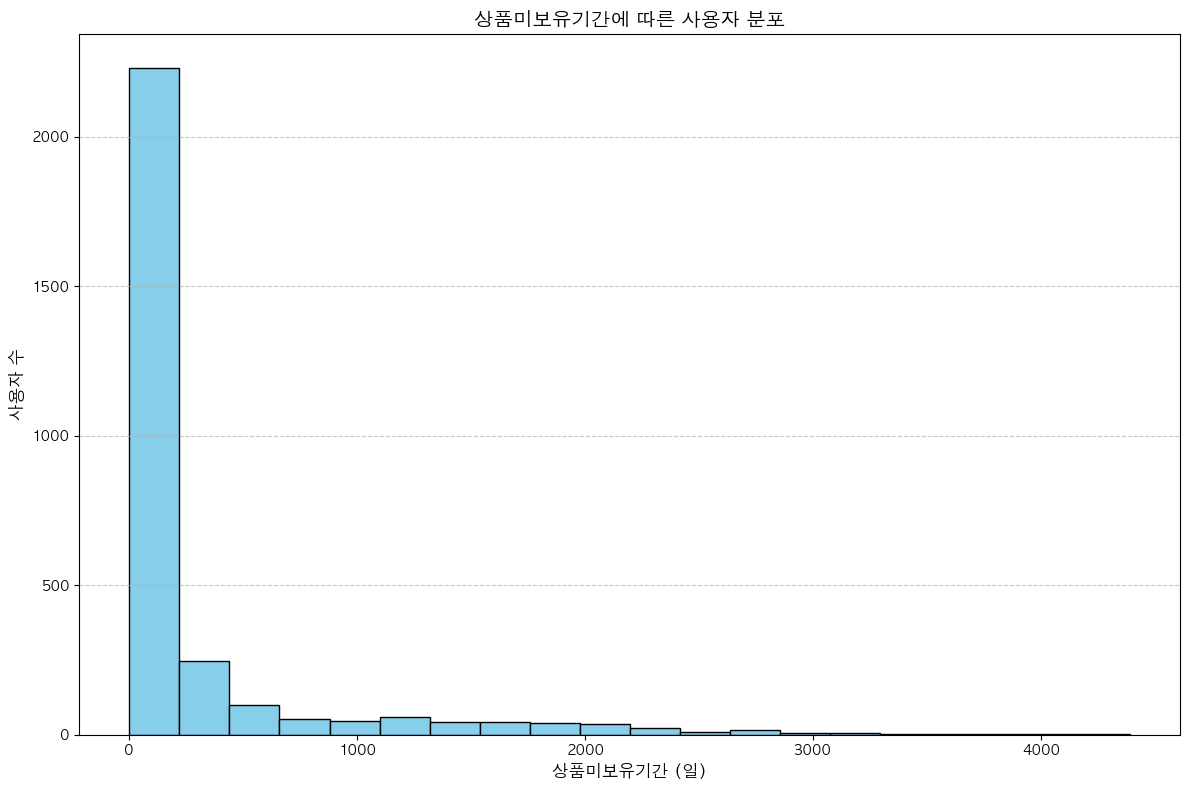

In [174]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.figure(figsize=(12, 8))
plt.hist(event_prod_rejoin_prod_df['non_prod_term'], bins=20, weights=event_prod_rejoin_prod_df['cnt'], color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



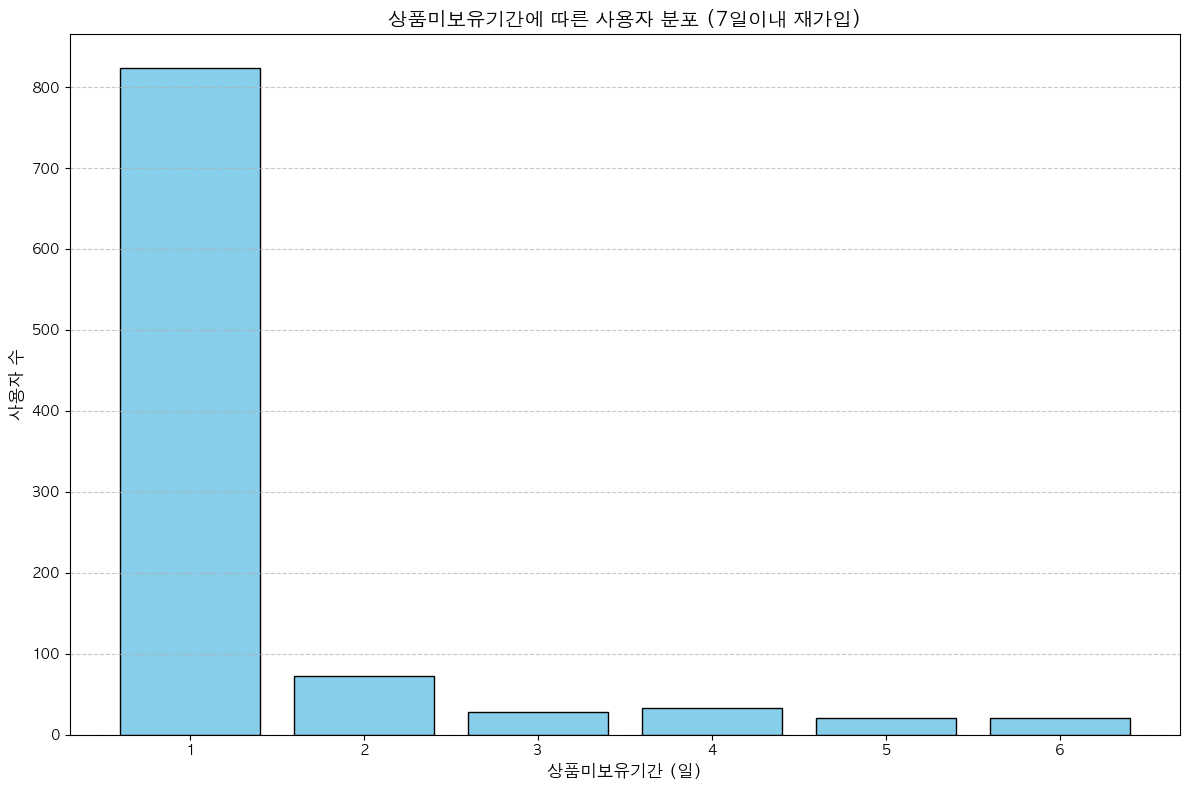

In [141]:
# non_prod_term = 0 제외
filtered_df = event_prod_rejoin_prod_df[event_prod_rejoin_prod_df['prod_group'] == '재가입신규(7일이내)'].copy()

# Bar Plot 생성
plt.figure(figsize=(12, 8))
plt.bar(filtered_df['non_prod_term'], filtered_df['cnt'], color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포 (7일이내 재가입)', fontsize=14)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


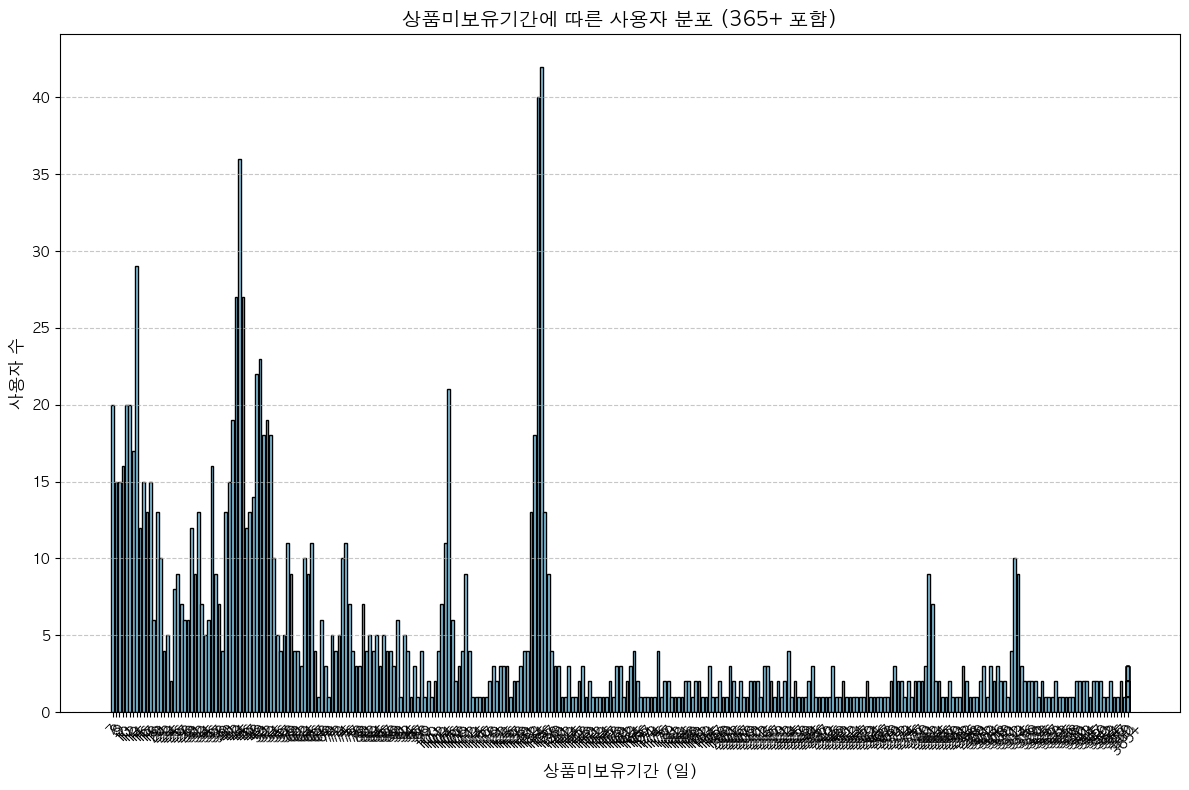

In [143]:
# non_prod_term = 0 제외
filtered_df = event_prod_rejoin_prod_df[event_prod_rejoin_prod_df['prod_group'] == '재가입신규(7일이후)'].copy()

# non_prod_term을 문자열로 변환하고 365 이상은 365로 처리
filtered_df['non_prod_term'] = filtered_df['non_prod_term'].apply(
    lambda x: '365+' if x >= 365 else str(x)
)

# Bar Plot 생성
plt.figure(figsize=(12, 8))
plt.bar(filtered_df['non_prod_term'], filtered_df['cnt'], color='skyblue', edgecolor='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포 (365+ 포함)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [186]:
# 재가입신규 - 상품미보유기간 x 뮤직웨이브이벤트 참여 여부에 따른 사용자 분포
event_prod_rejoin_prod_query_2 = '''
select prod_group
     , musicwave_event_ent_yn
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where prod_group in ('재가입신규(7일이후)','재가입신규(7일이내)')
group by 1,2
order by 1,2
    
'''

cur.execute(event_prod_rejoin_prod_query_2)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_rejoin_prod_df_2 = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_rejoin_prod_df_2.head()

,prod_group,musicwave_event_ent_yn,cnt
0,재가입신규(7일이내),N,413
1,재가입신규(7일이내),Y,586
2,재가입신규(7일이후),N,1031
3,재가입신규(7일이후),Y,922


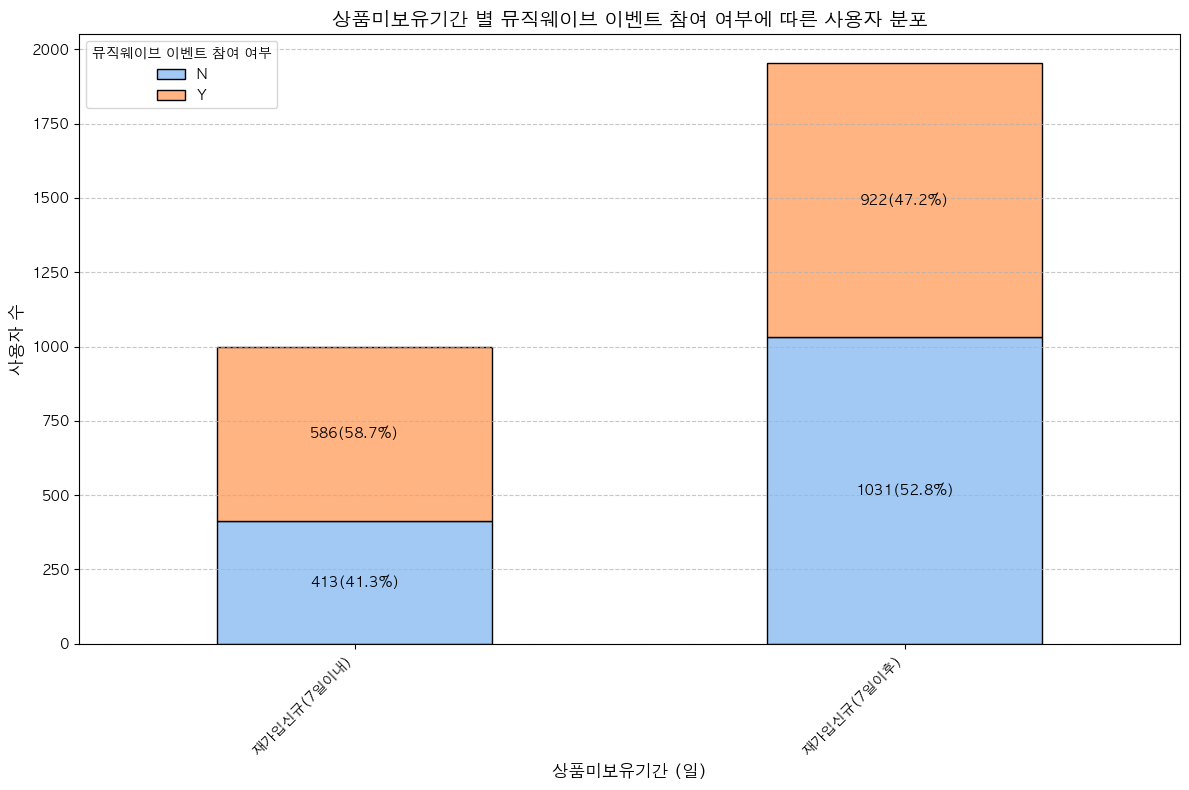

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
pivot_df = event_prod_rejoin_prod_df_2.pivot(index='prod_group', columns='musicwave_event_ent_yn', values='cnt').fillna(0)

# 전체 합계 계산 (비중 계산용)
pivot_df['total'] = pivot_df.sum(axis=1)

# 색상 팔레트 설정
colors = sns.color_palette("pastel", len(pivot_df.columns) - 1)

# Bar Plot 생성
ax = pivot_df.drop(columns='total').plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, edgecolor='black')

# 각 막대 위에 건수와 비중 표시
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            total = pivot_df.iloc[int(bar.get_x() + bar.get_width() / 2)]['total']
            percentage = (height / total) * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                    f'{int(height)}({percentage:.1f}%)', ha='center', va='center', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간 별 뮤직웨이브 이벤트 참여 여부에 따른 사용자 분포', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='뮤직웨이브 이벤트 참여 여부', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

In [169]:
# 최초신규 - 상품미보유기간에 따른 사용자 분포
event_prod_first_prod_query = '''
select case
          when non_prod_term between 0 and 6 then 'A) 0~6일'
          when non_prod_term between 7 and 30 then 'B) 7~30일'
          when non_prod_term between 31 and 90 then 'C) 31~90일'
          when non_prod_term between 91 and 180 then 'D) 91~180일'
          when non_prod_term between 181 and 365 then 'E) 181~365일'
          when non_prod_term > 365 then 'F) 365+'
       end as non_prod_term
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where prod_group = '최초신규'
group by 1
order by 1
    
'''

cur.execute(event_prod_first_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

event_prod_first_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
event_prod_first_prod_df.head()

,non_prod_term,cnt
0,A) 0~6일,686
1,B) 7~30일,43
2,C) 31~90일,56
3,D) 91~180일,64
4,E) 181~365일,47


In [194]:
1290-686

604

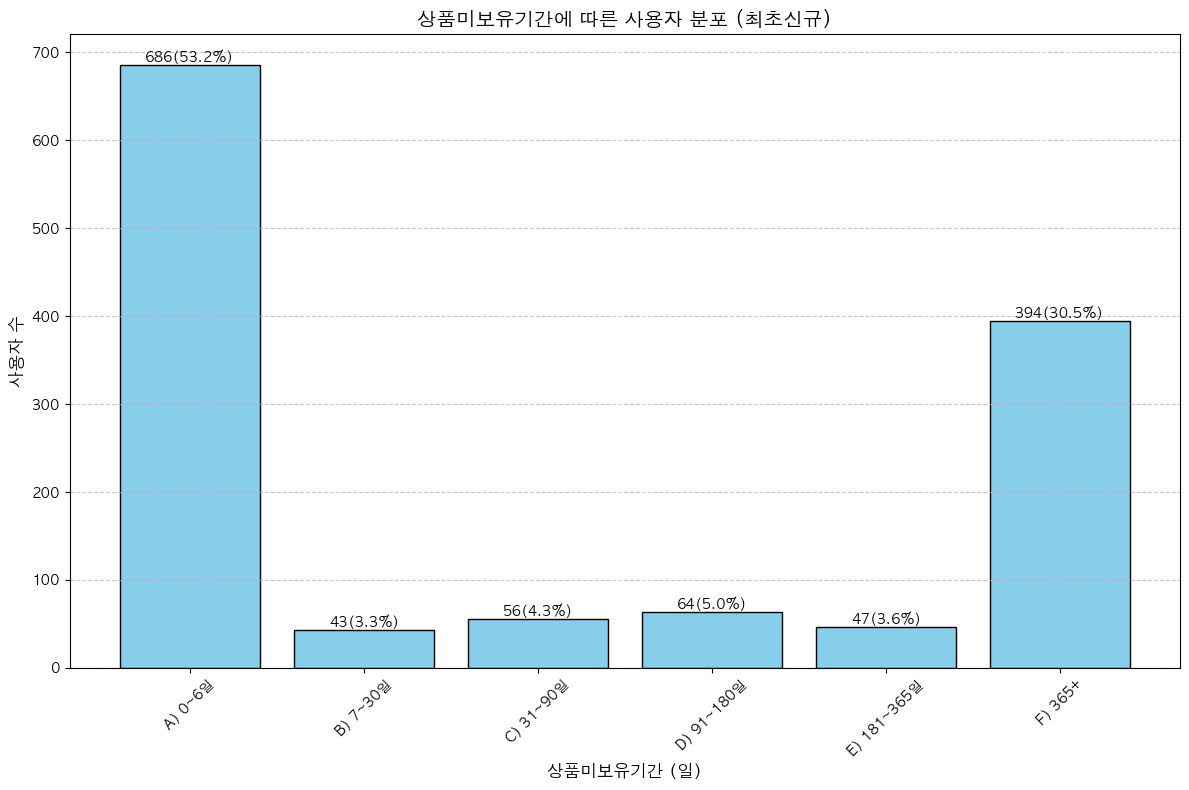

In [172]:
# 전체 사용자 수 계산
total_cnt = event_prod_first_prod_df['cnt'].sum()

# Bar Plot 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(event_prod_first_prod_df['non_prod_term'], event_prod_first_prod_df['cnt'], color='skyblue', edgecolor='black')

# 데이터 라벨 추가 (값과 비율 표시)
for bar, cnt in zip(bars, event_prod_first_prod_df['cnt']):
    height = bar.get_height()
    percentage = (cnt / total_cnt) * 100  # 비율 계산
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(cnt)}({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('상품미보유기간 (일)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('상품미보유기간에 따른 사용자 분포 (최초신규)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [158]:
# 기존상품보유자 - 상품미보유기간에 따른 사용자 분포
keep_prod_query = '''
select musicwave_event_ent_yn
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
where (prod_group = '기존상품' or prod_group is null)
group by 1
order by 1
    
'''

cur.execute(keep_prod_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

keep_prod_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
keep_prod_df.head()

,musicwave_event_ent_yn,cnt
0,N,5553
1,Y,7197


In [193]:
7197/(7197 + 5553)*100

56.44705882352942

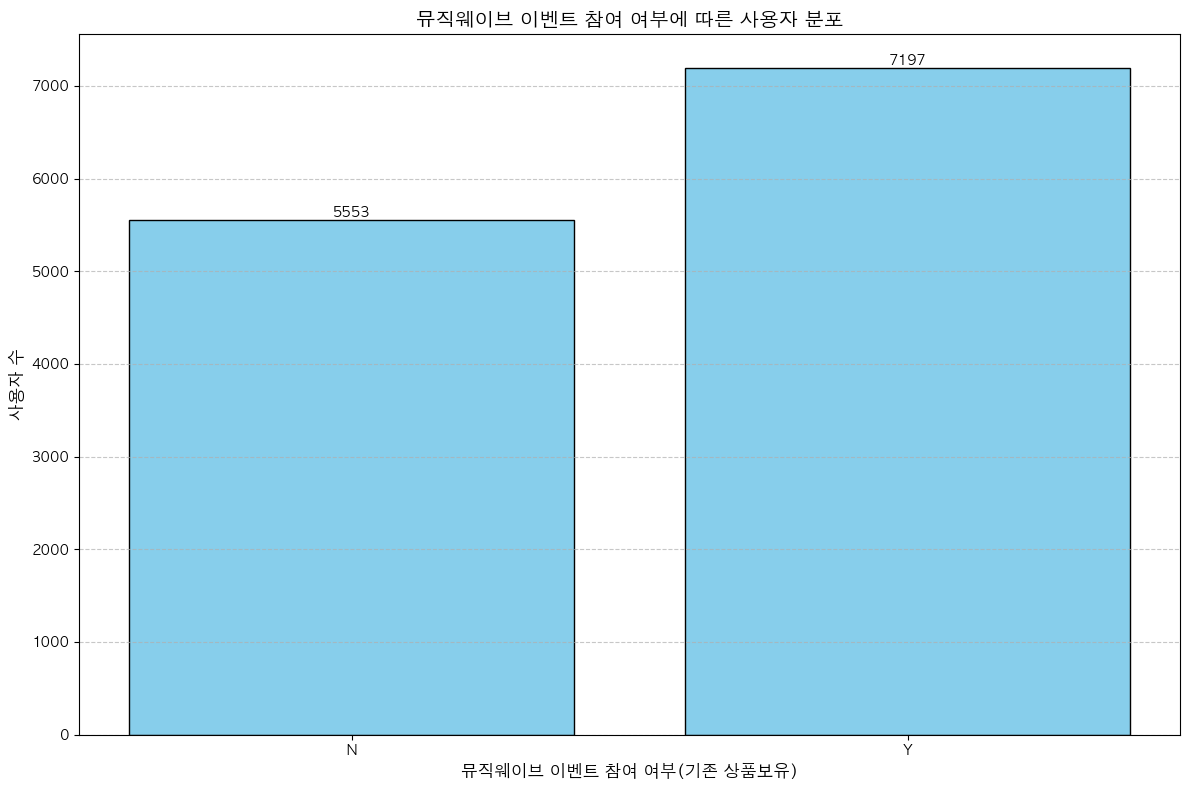

In [191]:
import matplotlib.pyplot as plt

# Bar Plot 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(keep_prod_df['musicwave_event_ent_yn'], keep_prod_df['cnt'], color='skyblue', edgecolor='black')

# 각 막대 위에 cnt 값 표시
for bar, cnt in zip(bars, keep_prod_df['cnt']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(cnt)}', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('뮤직웨이브 이벤트 참여 여부(기존 상품보유)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('뮤직웨이브 이벤트 참여 여부에 따른 사용자 분포', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [161]:
# 기존상품보유자 - 상품미보유기간에 따른 사용자 분포
musicwave_event_query = '''
select musicwave_event_ent_yn
     , count(distinct member_key) as cnt
from hadoop_kent.melon_sys_temp_production.samuel_plave_event_ent_user_tb
group by 1
order by 1
    
'''

cur.execute(musicwave_event_query)

results = cur.fetchall()
colnames = [part[0] for part in cur.description]

musicwave_event_df = pd.DataFrame(results, columns=colnames)

cur.cancel()
conn.close()
musicwave_event_df.head()

,musicwave_event_ent_yn,cnt
0,N,7770
1,Y,9222


In [227]:
7197 + 922 + 586

8705

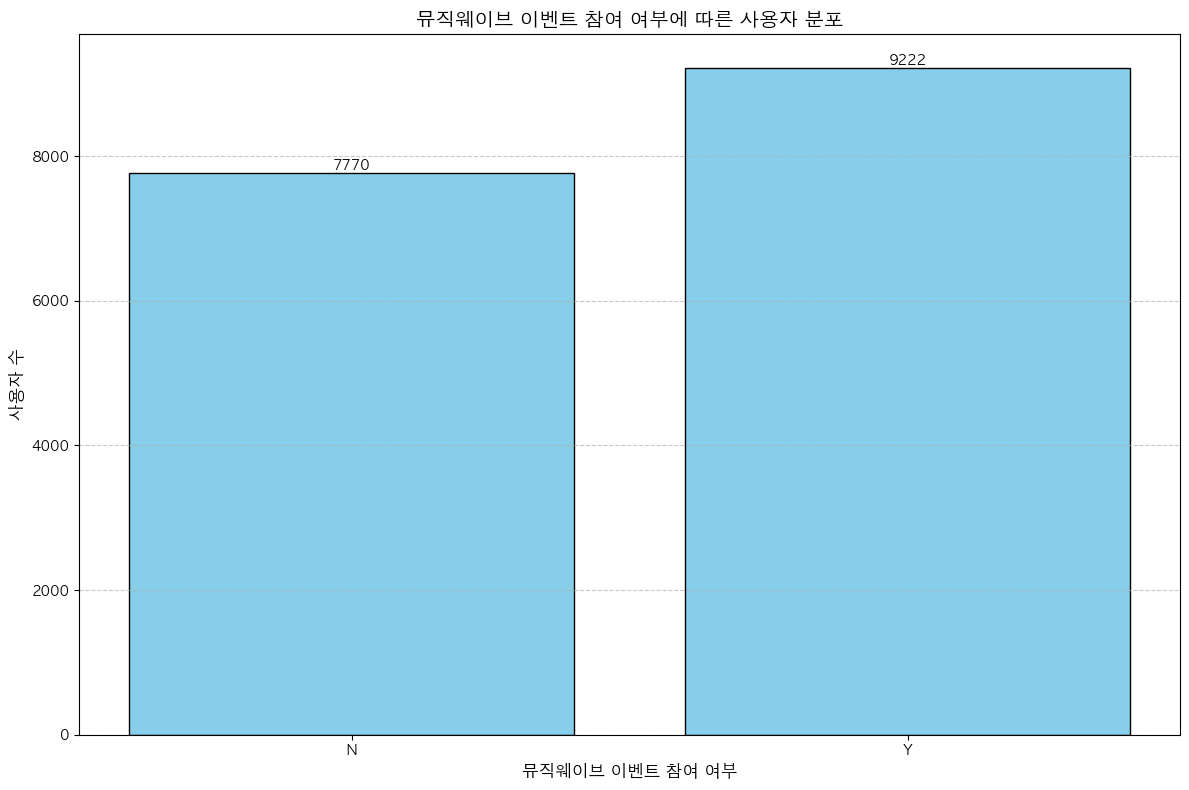

In [176]:
import matplotlib.pyplot as plt

# Bar Plot 생성
plt.figure(figsize=(12, 8))
bars = plt.bar(musicwave_event_df['musicwave_event_ent_yn'], musicwave_event_df['cnt'], color='skyblue', edgecolor='black')

# 각 막대 위에 cnt 값 표시
for bar, cnt in zip(bars, musicwave_event_df['cnt']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(cnt)}', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 꾸미기
plt.xlabel('뮤직웨이브 이벤트 참여 여부', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.title('뮤직웨이브 이벤트 참여 여부에 따른 사용자 분포', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()